In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print('done')

done


# **Original Dataset**

In [3]:
mydata=pd.read_csv('/Users/sahilchakraborty/Desktop/Intership_Project/Amazon Sale Report.csv')
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [4]:
mydata.head(5)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


 # **Taking a Demo Dataset for Analysis**

In [5]:
# Taking a demo dataset for analysis without altering the original Data

demo=pd.read_csv('/Users/sahilchakraborty/Desktop/Intership_Project/Amazon Sale Report.csv')
demo.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [6]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

**Cleaning the Dataset**

In [7]:
#Removed coloums having all null values

demo=demo.drop(columns=["New", "PendingS"])


In [8]:
# If Quantity ordered are 0 then there should be no value in the Amount coloum as well as the Courier Status should also be Cancelled

demo.loc[demo["Qty"] == 0, "Courier Status"] = "Cancelled"

In [9]:
demo.loc[demo["Qty"] == 0, "Amount"] = 0.0

In [10]:
# Formating Date by breaking it down to proper Month names , exact date and its Year

demo["Date"] = pd.to_datetime(demo["Date"], format="%m-%d-%y", errors="coerce")

# extract day, month name, year into new columns
demo["Day"] = demo["Date"].dt.day
demo["Month_Name"] = demo["Date"].dt.strftime("%B")   
demo["Year"] = demo["Date"].dt.year

In [11]:
demo["currency"].fillna(demo["currency"].mode()[0], inplace=True)


/var/folders/cv/jn5269f15g7gvsxdrc067lbc0000gn/T/ipykernel_92582/1057568489.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  demo["currency"].fillna(demo["currency"].mode()[0], inplace=True)


In [37]:
demo['fulfilled-by'] = demo['fulfilled-by'].fillna("Other")

# Dataset After Cleaning

In [38]:
demo.head(5)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,Day,Month_Name,Year
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-Shirt,S,Cancelled,...,0.0,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,30.0,April,2022.0
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,406.0,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,30.0,April,2022.0
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,Other,30.0,April,2022.0
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,Cancelled,...,0.0,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,30.0,April,2022.0
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,574.0,CHENNAI,TAMIL NADU,600073.0,IN,False,Other,30.0,April,2022.0


In [13]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128976 non-null  int64         
 1   Order ID            128976 non-null  object        
 2   Date                73867 non-null   datetime64[ns]
 3   Status              128976 non-null  object        
 4   Fulfilment          128976 non-null  object        
 5   Sales Channel       128976 non-null  object        
 6   ship-service-level  128976 non-null  object        
 7   Category            128976 non-null  object        
 8   Size                128976 non-null  object        
 9   Courier Status      128976 non-null  object        
 10  Qty                 128976 non-null  int64         
 11  currency            128976 non-null  object        
 12  Amount              128852 non-null  float64       
 13  ship-city           128941 no

In [14]:
demo.describe()

,index,Date,Qty,Amount,ship-postal-code,Day,Year
count,128976.000000,73867,128976.000000,128852.000000,128941.000000,73867.000000,73867.0
mean,64486.130427,2022-05-17 10:06:01.525444352,0.904401,585.169939,463945.677744,21.369583,2022.0
min,0.000000,2022-03-31 00:00:00,0.000000,0.000000,110001.000000,13.000000,2022.0
25%,32242.750000,2022-04-23 00:00:00,1.000000,399.000000,382421.000000,17.000000,2022.0
50%,64486.500000,2022-05-18 00:00:00,1.000000,568.000000,500033.000000,21.000000,2022.0
75%,96730.250000,2022-06-14 00:00:00,1.000000,771.000000,600024.000000,26.000000,2022.0
max,128974.000000,2022-06-29 00:00:00,15.000000,5584.000000,989898.000000,31.000000,2022.0
std,37232.897832,NaN,0.313368,331.258626,191458.488954,5.246503,0.0


**============================================================================================================**


## **Comprehensive Sales Analysis of Amazon Transactions**




 **Key Objectives of the Analysis**

The primary objectives of this analysis are as follows:

1. **Sales Overview** → Examine overall sales performance, identify key trends, and uncover time-based patterns.
2. **Product Analysis** → Assess the distribution of product categories, sizes, and quantities sold to highlight popular products.
3. **Fulfilment Analysis** → Evaluate the fulfilment methods adopted and measure their effectiveness in ensuring successful deliveries.
4. **Customer Segmentation** → Segment customers based on buying behavior, location, and other relevant factors for deeper insights.
5. **Geographical Analysis** → Analyze the geographical distribution of sales with emphasis on states and cities.
6. **Business Insights** → Derive actionable insights and recommendations to optimize sales strategies, improve customer satisfaction, and strengthen overall business performance.





#  **Sales Overview**

* **Total Revenue**

In [15]:
# Calculate summary metrics
total_revenue = demo["Amount"].sum()
avg_order_value = demo["Amount"].mean()
total_qty = demo["Qty"].sum()
total_orders = demo.shape[0]   # number of rows = number of orders

# Print them
print("📊 Sales Summary (Overall)")
print(f"Total Revenue      : {total_revenue:,.2f}")
print(f"Total Orders       : {total_orders:,}")
print(f"Average Order Value: {avg_order_value:,.2f}")
print(f"Total Quantity     : {total_qty:,}")


📊 Sales Summary (Overall)
Total Revenue      : 75,400,317.00
Total Orders       : 128,976
Average Order Value: 585.17
Total Quantity     : 116,646



### Insights :

1. **Strong Revenue Performance**

   * The business generated a total revenue of **₹75.4M** from **128,976 orders**, which highlights a **large customer base and strong sales volume**.

2. **Low Average Order Value (AOV)**

   * With an **AOV of just ₹585**, it suggests that customers are primarily making **low-ticket purchases**. Increasing **upsell/cross-sell strategies** could significantly boost overall revenue without needing more customers.

3. **Quantity vs. Orders Gap**

   * The total quantity sold is **116,646**, which is **lower than total orders (128,976)**. This indicates that **most customers purchase only 1 item per order**. Encouraging **bulk purchases or combo offers** could improve both **AOV and total revenue**.

---



### Order Status Distribution

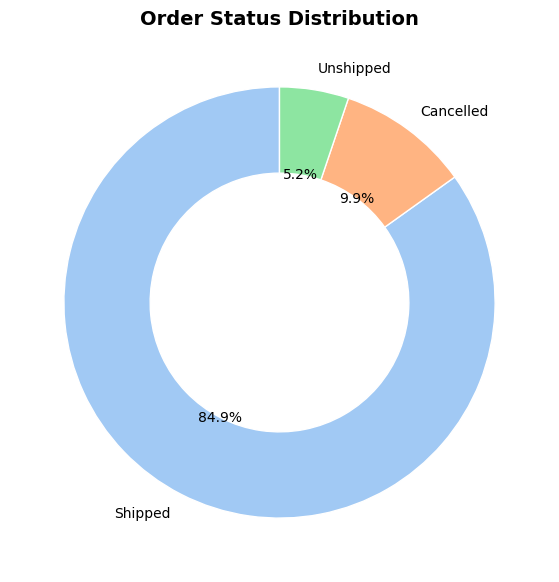

In [16]:
status_counts = demo["Courier Status"].value_counts()

# Colors from seaborn palette
colors = sns.color_palette("pastel")[0:len(status_counts)]

# Plot
plt.figure(figsize=(17,7))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%',
        startangle=90, colors=colors, wedgeprops=dict(width=0.4, edgecolor='w'))

# Title
plt.title("Order Status Distribution", fontsize=14, fontweight="bold")
plt.show()

### Insights :
1. **Majority of Orders are Successfully Shipped**
   – Around **84.9%** of orders are shipped, indicating strong fulfillment efficiency and customer satisfaction potential.

2. **Noticeable Order Cancellations**
   – Almost **10% of orders are cancelled**, which is significant. This could point to issues like pricing, product mismatch, or payment failures that need investigation.

3. **Unshipped Orders Indicate Operational Bottlenecks**
   – About **5.2% of orders remain unshipped**, suggesting possible stock shortages, delays in logistics, or order processing inefficiencies.

---

### Monthly Sales Trend

/var/folders/cv/jn5269f15g7gvsxdrc067lbc0000gn/T/ipykernel_92582/3846458771.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales = demo.groupby(["Year", "Month_Name"])["Amount"].sum().reset_index()


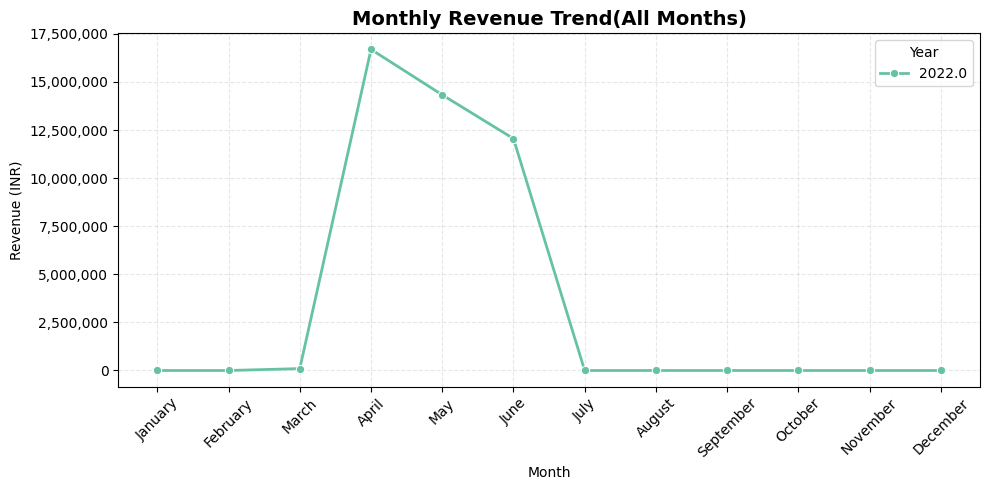

In [17]:
import calendar

# Ensure Month order is Jan–Dec
month_order = list(calendar.month_name)[1:]  
demo["Month_Name"] = pd.Categorical(demo["Month_Name"], categories=month_order, ordered=True)

# Group monthly revenue
monthly_sales = demo.groupby(["Year", "Month_Name"])["Amount"].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(
    data=monthly_sales, 
    x="Month_Name", 
    y="Amount", 
    hue="Year", 
    marker="o", 
    palette="Set2", 
    linewidth=2.0
)

plt.title("Monthly Revenue Trend(All Months)", fontsize=14, fontweight="bold")
plt.xlabel("Month")
plt.ylabel("Revenue (INR)")
plt.xticks(rotation=45)

# Format Y axis with commas
from matplotlib.ticker import FuncFormatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ",")))

plt.grid(alpha=0.3, linestyle="--")
plt.tight_layout()
plt.show()

### Insights :

If we **only consider April–June 2022 (the months with actual data)**, here are 3 refined insights:

1. **Strongest Month – April**
   – Revenue peaked at **\~₹16.7M in April**, making it the **highest revenue-generating month** in the dataset.

2. **Gradual Decline After April**
   – After the April peak, revenue **dropped by ~~15% in May (~~₹14.5M)** and further by **~~17% in June (~~₹12.2M)**, indicating a downward trend post-peak.

3. **Q2 Dominates Revenue Contribution**
   – The entire **Q2 (Apr–Jun)** accounts for **100% of the dataset’s revenue (\~₹43.4M)**, showing a **highly concentrated sales window** within just 3 months.
---


### Revenue Distribution

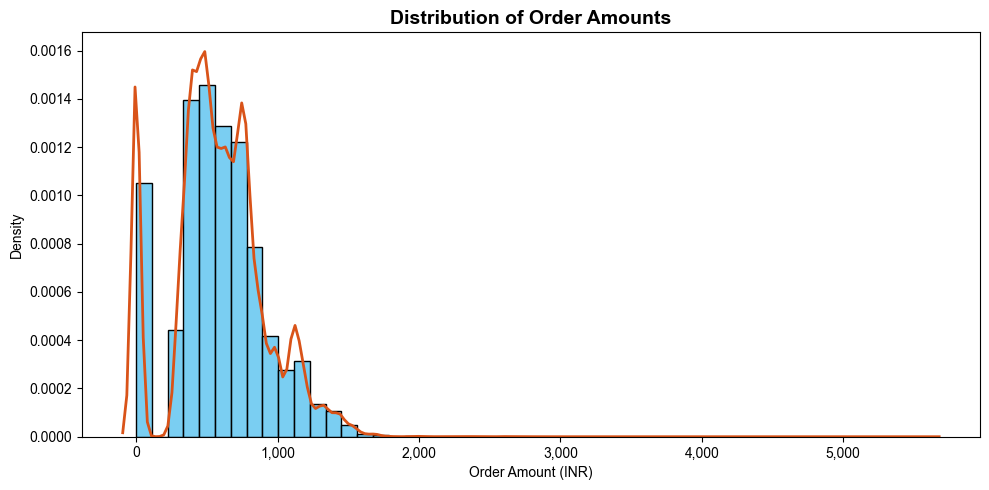

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

plt.figure(figsize=(10,5))

# Histogram
sns.histplot(
    demo["Amount"], 
    bins=50, 
    color="#4DBEEE",   
    edgecolor="black", 
    stat="density"     # normalize so KDE overlays nicely
)

# KDE Line
sns.kdeplot(
    demo["Amount"], 
    color="#D95319",   
    fill=False
)

plt.title("Distribution of Order Amounts", fontsize=14, fontweight="bold")
plt.xlabel("Order Amount (INR)")
plt.ylabel("Density")
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}"))  # commas in X-axis
sns.set_style('darkgrid')
plt.tight_layout()
plt.show()


### Insights :


1. **Majority of Orders in the ₹200–₹1,000 Range**
   – The distribution is **heavily concentrated between ₹200 and ₹1,000**, meaning most customers spend in this band.
   – This is your **core revenue driver segment**.

2. **Long Tail of High-Value Orders**
   – While rare, some orders go beyond ₹3,000–₹5,000.
   – These high-value orders are **outliers but contribute significantly to revenue**, even though they represent a very small % of transactions.

3. **Small Peak Near Low Order Amounts (<₹200)**
   – The initial spike near **very low amounts** suggests **a segment of budget customers** making minimal purchases.
   – They increase order count but don’t contribute much to revenue.

4. **Distribution is Right-Skewed**
   – Most customers spend less, but a few big spenders **stretch the average order value upwards**.
   – Strategy-wise, this means **retaining and upselling to high-value customers** could disproportionately increase revenue.

 So in short:
– **Bulk of sales volume** = ₹200–₹1,000 orders
– **Bulk of revenue** = mid-to-high orders, especially outliers
– We have **3 customer bands**: budget (<₹200), core (₹200–₹1,000), and premium (>₹1,500).

---


### Seasonal & Daily Patterns

/var/folders/cv/jn5269f15g7gvsxdrc067lbc0000gn/T/ipykernel_92582/726434637.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


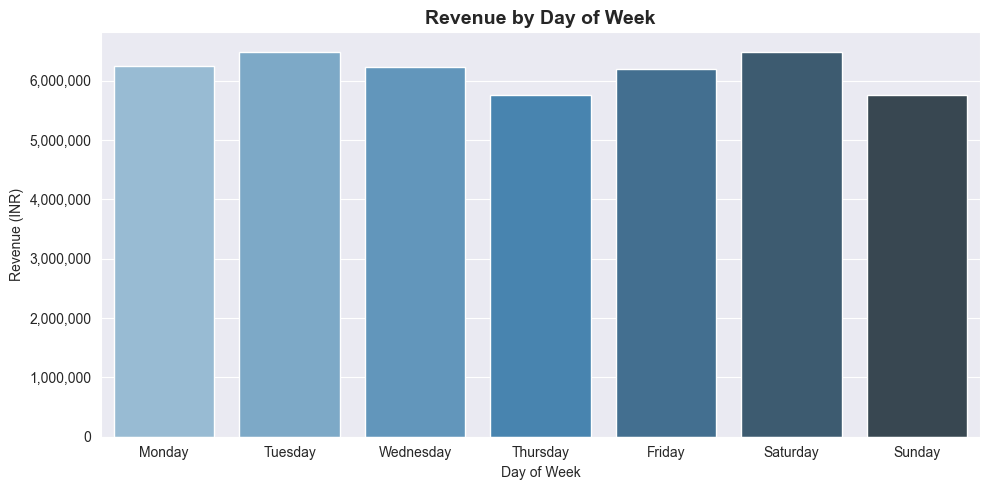

/var/folders/cv/jn5269f15g7gvsxdrc067lbc0000gn/T/ipykernel_92582/726434637.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  month_sales = demo.groupby("Month_Name")["Amount"].sum().reset_index()
/var/folders/cv/jn5269f15g7gvsxdrc067lbc0000gn/T/ipykernel_92582/726434637.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


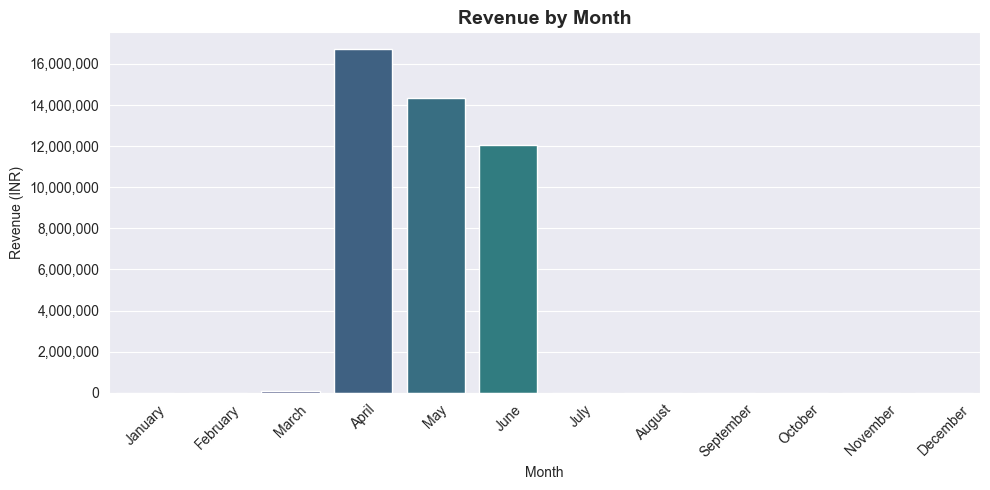

In [ ]:
# --- Revenue by Day of Week ---
dow_sales = demo.groupby(demo["Date"].dt.day_name())["Amount"].sum().reset_index()

# Order days properly (Mon-Sun)
days_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
dow_sales["Date"] = pd.Categorical(dow_sales["Date"], categories=days_order, ordered=True)
dow_sales = dow_sales.sort_values("Date")

plt.figure(figsize=(10,5))
sns.barplot(
    data=dow_sales,
    x="Date",
    y="Amount",
    palette="Blues_d"
)
plt.title("Revenue by Day of Week", fontsize=14, fontweight="bold")
plt.xlabel("Day of Week")
plt.ylabel("Revenue (INR)")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}"))  
sns.set_style('darkgrid')
plt.tight_layout()
plt.show()


# --- Revenue by Month ---
month_sales = demo.groupby("Month_Name")["Amount"].sum().reset_index()


month_order = ["January","February","March","April","May","June","July","August",
               "September","October","November","December"]
month_sales["Month_Name"] = pd.Categorical(month_sales["Month_Name"], categories=month_order, ordered=True)
month_sales = month_sales.sort_values("Month_Name")

plt.figure(figsize=(10,5))
sns.barplot(
    data=month_sales,
    x="Month_Name",
    y="Amount",
    palette="viridis"
)
plt.title("Revenue by Month", fontsize=14, fontweight="bold")
plt.xlabel("Month")
plt.ylabel("Revenue (INR)")
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}"))
sns.set_style('darkgrid')
plt.tight_layout()
plt.show()

### Insights :


### 1. **Revenue by Day of Week**

* **Highest Revenue Day** → **Saturday** (peak around ₹6.5M+).
* **Lowest Revenue Day** → **Thursday & Sunday** (just below ₹6M).
* **Pattern** → Weekdays are relatively stable, but revenue **peaks during weekends (Saturday)**, suggesting customer activity is higher then.
* **Business Implication**:

  * Promotions on **Thursday/Sunday** could help balance the dip.
  * Saturdays should be leveraged for **premium campaigns or product launches**, since customers are more active.



### 2. **Revenue by Month**

* **Highest Revenue Month** → **April** (\~₹16.5M).
* **Strong Months** → April, May, and June (Q2).
* **Lowest Months** → January, February, and July–December (almost negligible in this dataset).
* **Pattern**:

  * Revenue is heavily concentrated in **Q2 (April–June)**.
  * Could be seasonal (festivals, holidays, or product cycles).
* **Business Implication**:

  * Plan **inventory and staffing** for Q2 demand surge.
  * Explore ways to **boost off-season sales (Q1 & Q3-Q4)** with discounts, marketing campaigns, or new product launches.



**Overall Insight**:

* The business has **weekly peaks on weekends** and **annual peaks in Q2**.
* Revenue distribution is uneven → strong dependency on a few months and days.
* Growth opportunity lies in **stabilizing weaker periods** (Thursday, Sunday, and non-Q2 months).

---


### Top 5 High Sales Month

/var/folders/cv/jn5269f15g7gvsxdrc067lbc0000gn/T/ipykernel_92582/4066184707.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_df, x="Month_Name", y="Amount", order=order, palette="crest", ax=ax)


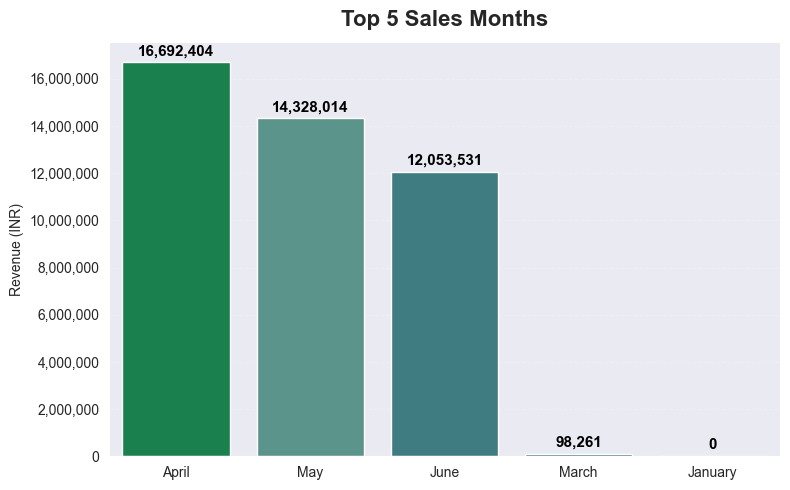

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Top 5 months by revenue 
plot_df = monthly_sales.sort_values("Amount", ascending=False).head(5).copy()
plot_df["Month_Name"] = plot_df["Month_Name"].astype(str)   

order = plot_df["Month_Name"].tolist()  

fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(data=plot_df, x="Month_Name", y="Amount", order=order, palette="crest", ax=ax)

ax.set_title("Top 5 Sales Months", fontsize=16, fontweight="bold", pad=12)
ax.set_xlabel("")
ax.set_ylabel("Revenue (INR)")
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{int(y):,}"))

# Add value labels 
y_offset = 0.01 * plot_df["Amount"].max()
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f"{int(height):,}",
                (bar.get_x() + bar.get_width()/2, height + y_offset),
                ha="center", va="bottom", fontsize=11, fontweight="bold", color="black")

max_bar = max(ax.patches, key=lambda b: b.get_height())
max_bar.set_facecolor((0.1, 0.5, 0.3))  

sns.despine()
plt.grid(axis="y", alpha=0.2, linestyle="--")
plt.tight_layout()
plt.show()

### Insights

* Sales activity is **highly seasonal**, concentrated only in **April, May, and June**.
* **April (₹16.69M)** marks the **peak demand**, with the highest revenue.
* **May (₹14.32M)** shows a **\~14% decline** from April, still maintaining strong sales.
* **June (₹12.05M)** records another **\~15% drop** from May, indicating a steady tapering after the peak.
* Overall, the trend suggests **April as the best-performing month**, followed by a **gradual downward slope** in the subsequent months.
* Business strategies should **maximize campaigns and product launches in April** and use **discounts or retention offers in May–June** to mitigate the decline.

---



**============================================================================================================**

# **Product Analysis:**

### Category Distribution

* **To see which product categories dominate.**

/var/folders/cv/jn5269f15g7gvsxdrc067lbc0000gn/T/ipykernel_92582/3879035683.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=demo, x='Category', palette='viridis', order=demo['Category'].value_counts().index)


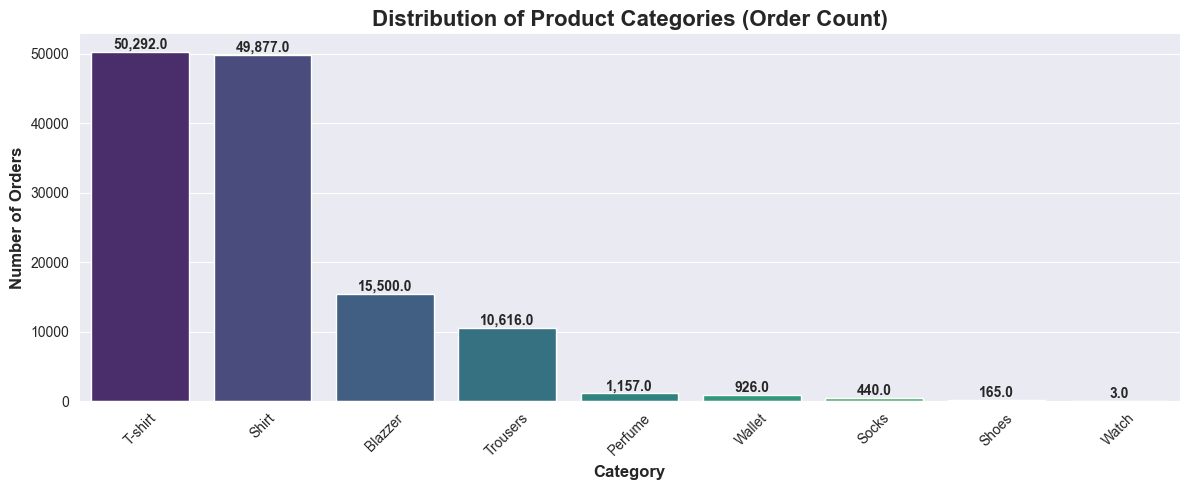

In [ ]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data=demo, x='Category', palette='viridis', order=demo['Category'].value_counts().index)


for p in ax.patches:
    ax.annotate(f'{p.get_height():,}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Distribution of Product Categories (Order Count)", fontsize=16, fontweight='bold')
plt.xlabel("Category", fontsize=12, fontweight='bold')
plt.ylabel("Number of Orders", fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
sns.set_style('darkgrid')

plt.show()

### Insights :

1.  **Extreme Sales Concentration**: The chart is a clear demonstration of the Pareto Principle. The two leading categories, T-Shirt and Shirt, account for a combined total of over 90,000 units sold, which represents over 83% of the total sales for all categories. This indicates that a very small portion of the product catalog is responsible for the vast majority of the sales volume.

2.  **Significant Drop-Off After Top Performers**: There is a huge and immediate drop in sales after the top two categories. The next two best-sellers, Blazer and Trousers, have sales numbers that are a full order of magnitude lower than the leading categories, highlighting a lack of diversity in high-performing products.

3.  **Actionable Strategy Based on Performance**: The data reveals distinct tiers of products that require different strategies. The top-selling items (T-Shirt and Shirt) are high-yield products that should be prioritized for inventory and marketing. In contrast, the bottom-tier items, particularly **Watch** with only 3 units sold, are severe underperformers and should be evaluated for potential discontinuation to optimize resources.

---

### Category vs Quantity Sold

* **To compare categories by total items sold, not just order count.**

/var/folders/cv/jn5269f15g7gvsxdrc067lbc0000gn/T/ipykernel_92582/1488108412.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_qty.values, y=category_qty.index, palette="mako")


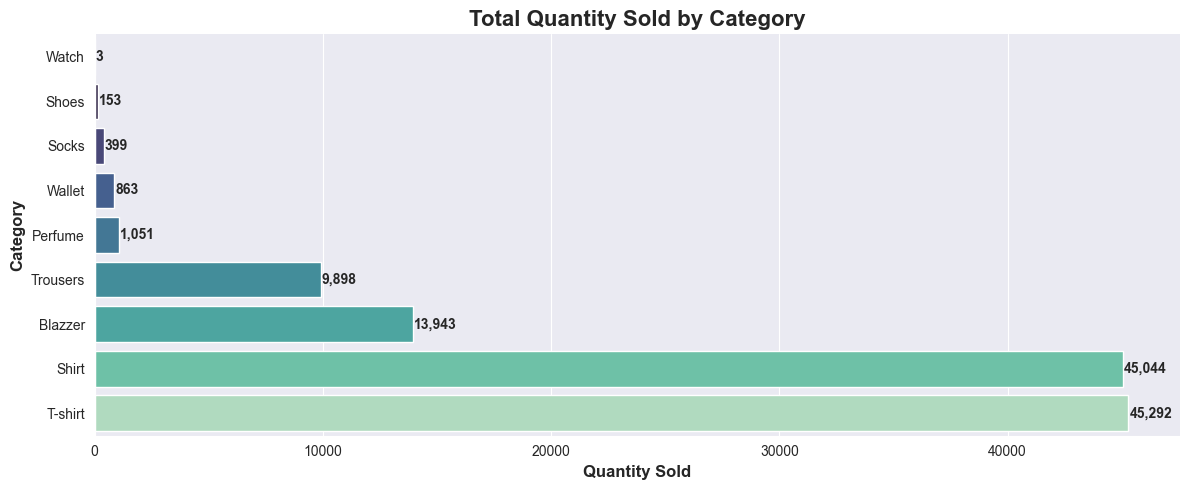

In [22]:
category_qty = demo.groupby('Category')['Qty'].sum().sort_values(ascending=True)

# Plot
plt.figure(figsize=(12,5))
ax = sns.barplot(x=category_qty.values, y=category_qty.index, palette="mako")

# Add labels on bars
for p in ax.patches:
    plt.text(p.get_width() + 50,          # small offset from bar end
             p.get_y() + p.get_height()/2, 
             f'{int(p.get_width()):,}', 
             va='center', fontsize=10, fontweight='bold')

# Titles and styling
plt.title("Total Quantity Sold by Category", fontsize=16, fontweight='bold')
plt.xlabel("Quantity Sold", fontsize=12, fontweight='bold')
plt.ylabel("Category", fontsize=12, fontweight='bold')
sns.despine()
plt.tight_layout()
sns.set_style('darkgrid')

plt.show()

### Insights :

* **Significant Sales Discrepancy**: The two top-selling categories, **T-Shirt** ($45,292$) and **Shirt** ($45,044$), have sales that are vastly higher than all other categories. Their combined sales represent over $85\%$ of the total units sold. This highlights a classic example of the **Pareto Principle**, or the **80/20 rule**, where a small number of items account for the majority of the results.

* **Second Tier of Sales**: Following the top two categories, there is a substantial drop-off in sales. **Blazer** ($13,943$) and **Trousers** ($9,898$) form a clear second tier. They have moderate sales compared to the top two but are still significantly more popular than the lowest-selling items.

* **Low-Performing Categories**: There is a considerable gap between the top-selling items and the rest of the categories, which have very low sales numbers. **Perfume** ($1,051$), **Wallet** ($863$), **Socks** ($399$), **Shoes** ($153$), and **Watch** ($3$) all contribute very little to the overall quantity sold.

* **Watch is a Severe Underperformer**: The **Watch** category has an extremely low quantity sold of only $3$ units. This indicates a potential issue with this product, such as a lack of demand, poor marketing, or an inventory problem.

* **Data Visualization**: The plot is a **horizontal bar chart**, which is effective for comparing the magnitudes of different categories. The bars are sorted in descending order, making it easy to identify the best and worst-selling products at a glance. The values are also displayed on each bar, providing the exact quantity sold for each category.

---

### Size Distribution

 * **To check which sizes (S, M, L, XL, etc.) are most popular.**

/var/folders/cv/jn5269f15g7gvsxdrc067lbc0000gn/T/ipykernel_92582/2793672059.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=size_counts.index, y=size_counts.values, palette="crest")


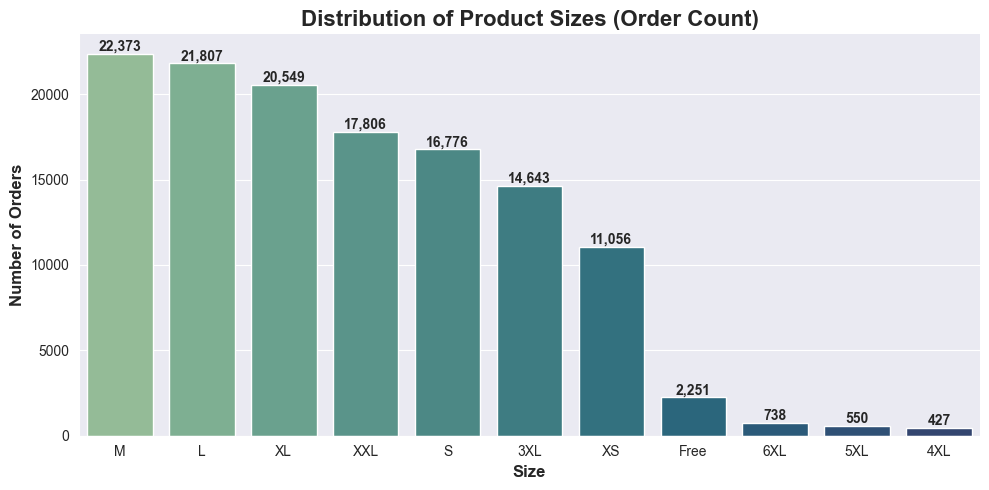

/var/folders/cv/jn5269f15g7gvsxdrc067lbc0000gn/T/ipykernel_92582/2793672059.py:30: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  ax = sns.pointplot(x=size_perc.values, y=size_perc.index,
/var/folders/cv/jn5269f15g7gvsxdrc067lbc0000gn/T/ipykernel_92582/2793672059.py:30: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot(x=size_perc.values, y=size_perc.index,


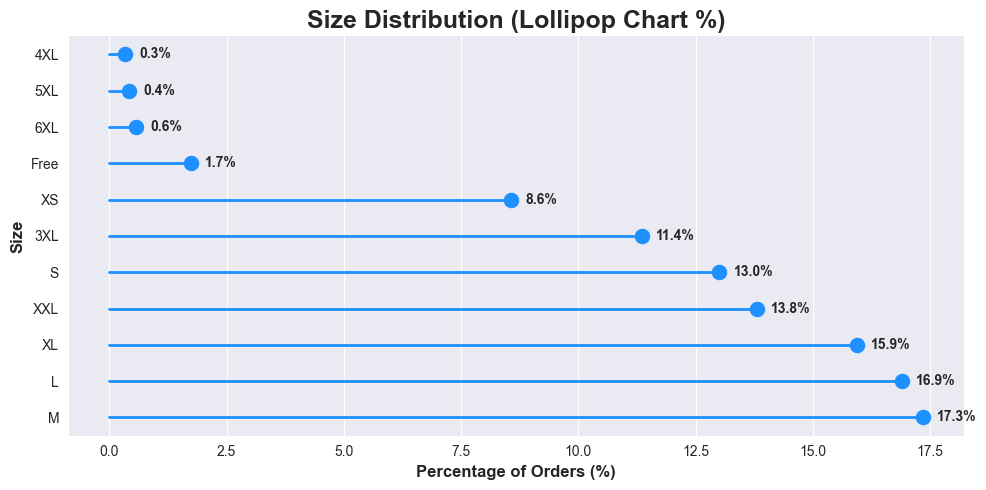

In [ ]:
size_counts = demo['Size'].value_counts()

plt.figure(figsize=(10,5))
sns.set_style('darkgrid')

ax = sns.barplot(x=size_counts.index, y=size_counts.values, palette="crest")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Distribution of Product Sizes (Order Count)", fontsize=16, fontweight='bold')
plt.xlabel("Size", fontsize=12, fontweight='bold')
plt.ylabel("Number of Orders", fontsize=12, fontweight='bold')
sns.despine()
plt.tight_layout()
plt.show()


#Percentage Distribution of Sizes


size_perc = (size_counts / size_counts.sum() * 100).sort_values(ascending=True)

plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
ax = sns.pointplot(x=size_perc.values, y=size_perc.index, 
                   color="dodgerblue", join=False, markers="o", scale=1.5)

for i, v in enumerate(size_perc.values):
    plt.plot([0, v], [i, i], color="dodgerblue", lw=2)

for i, v in enumerate(size_perc.values):
    plt.text(v+0.3, i, f"{v:.1f}%", va='center', fontsize=10, fontweight='bold')

plt.title("Size Distribution (Lollipop Chart %)", fontsize=18, fontweight='bold')
plt.xlabel("Percentage of Orders (%)", fontsize=12, fontweight='bold')
plt.ylabel("Size", fontsize=12, fontweight='bold')
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

### Insights :

1.  **Dominance of Mid-Range Sizes**: Both charts clearly show that medium, large, and extra-large sizes are overwhelmingly the most popular. The vertical bar chart (Order Count) reveals that the top five sizes (M, L, XL, XXL, and S) all have over 16,000 orders each. The lollipop chart confirms this, showing that these five sizes collectively account for over $78\%$ of all orders, demonstrating a heavy concentration of demand.

2.  **The "Long Tail" of Extreme Sizes**: There is a dramatic drop-off in demand for both the smallest (XS) and the largest sizes (4XL, 5XL, 6XL). The bar chart visualizes this steep decline in absolute numbers, with orders dropping from thousands to just a few hundred. The lollipop chart reinforces this by showing that these fringe sizes contribute less than $1\%$ each to the total number of orders, indicating they are a very low-demand segment of the market.

3.  **Informed Inventory Strategy**: The data provides clear guidance for inventory management. A business should prioritize stocking a wide variety and large quantities of the most popular sizes (M, L, XL, XXL) to meet high customer demand and prevent stock-outs. Conversely, for the least popular sizes (especially 4XL, 5XL, and 6XL), a strategy of limited inventory, made-to-order production, or even phasing them out could be implemented to reduce carrying costs and avoid unsold stock.

---

### Category + Size Combination Analysis


* **Showing top Categories selling the most at every size cap**

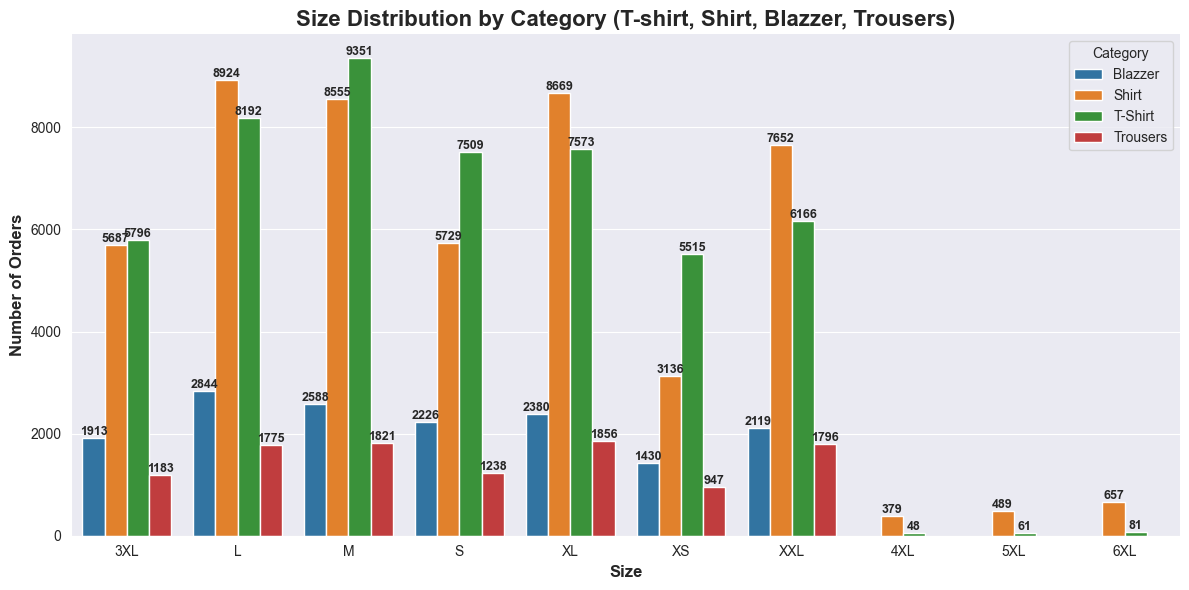

In [ ]:
demo['Category'] = demo['Category'].str.strip().str.title()
categories = ['T-Shirt', 'Shirt', 'Blazzer', 'Trousers']  

filtered = demo[demo['Category'].isin(categories)]


# Count sizes per category
size_category_counts = filtered.groupby(['Category', 'Size']).size().reset_index(name='Count')

plt.figure(figsize=(12,6))
ax = sns.barplot(data=size_category_counts, x='Size', y='Count', hue='Category')

# Add labels on bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:  
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=9, fontweight='bold')

# Titles and styling
plt.title("Size Distribution by Category (T-shirt, Shirt, Blazzer, Trousers)", fontsize=16, fontweight='bold')
plt.xlabel("Size", fontsize=12, fontweight='bold')
plt.ylabel("Number of Orders", fontsize=12, fontweight='bold')
plt.legend(title="Category")
sns.despine()
plt.tight_layout()
plt.show()

### Insights :

1.  **Size-Specific Leadership**: While the **Shirt** category is a top performer, the **T-shirt** category is a stronger leader for specific sizes. T-shirts have more orders for medium ($9,351$), small ($7,509$), and extra-small ($5,515$) sizes. Conversely, shirts are the clear best-sellers for sizes L, XL, and XXL, indicating a slight difference in customer fit preferences between these two dominant categories.

2.  **Performance Hierarchy**: A clear sales hierarchy exists across the categories. **T-shirt** and **Shirt** consistently lead the pack with thousands of orders per size. **Blazer** is the third-best-selling category, followed by **Trousers**, which consistently has the lowest number of orders among the four for most sizes, confirming its status as a lower-volume product.

3.  **Low and Niche Demand for Extreme Sizes**: All four categories show extremely low order counts for sizes 4XL, 5XL, and 6XL. The **Shirt** and **T-shirt** categories, however, still receive some orders, while the **Blazer** and **Trousers** categories have a minimal to non-existent presence in these sizes. This suggests that the market for these extreme sizes is a very small niche, primarily served by the most popular product categories.

---

### Top Selling Products

* **Using Pareto chart identifing top products driving sales (bar + line showing cumulative % of sales).**

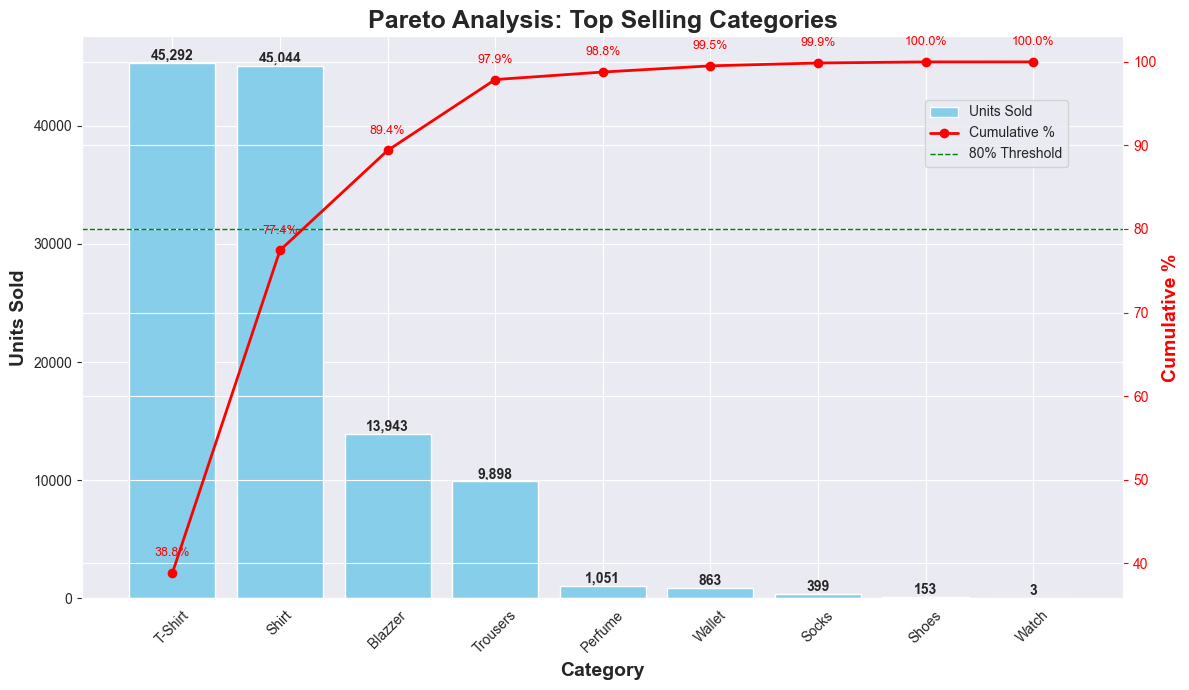

In [ ]:
demo['Category'] = demo['Category'].str.strip().str.title()

category_sales = demo.groupby("Category")['Qty'].sum().sort_values(ascending=False)

# Cumulative %
cum_percentage = category_sales.cumsum() / category_sales.sum() * 100

fig, ax1 = plt.subplots(figsize=(12, 7))

bars = ax1.bar(category_sales.index, category_sales.values, color="skyblue", label="Units Sold")
ax1.set_xlabel("Category", fontsize=14, fontweight='bold')
ax1.set_ylabel("Units Sold", fontsize=14, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)

for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 2,   
             f'{height:,}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Secondary axis (cumulative %)
ax2 = ax1.twinx()
line, = ax2.plot(category_sales.index, cum_percentage.values, 
                 color="red", marker="o", linewidth=2, label="Cumulative %")
ax2.set_ylabel("Cumulative %", fontsize=14, fontweight='bold', color='red')
ax2.tick_params(axis='y', colors='red')

for i, val in enumerate(cum_percentage.values):
    ax2.text(i, val + 2, f'{val:.1f}%', color="red", fontsize=9, ha='center')

# Add 80% threshold line
ax2.axhline(80, color="green", linestyle="--", linewidth=1, label="80% Threshold")

fig.legend(loc= "upper right", bbox_to_anchor=(0.9, 0.86), fontsize=10)

plt.title("Pareto Analysis: Top Selling Categories", fontsize=18, fontweight='bold')
fig.tight_layout()
plt.show()

### Insights :

1.  **Clear 80/20 Rule Application**: The chart is a perfect example of the Pareto Principle. The top two categories, **T-Shirt** and **Shirt**, alone account for a staggering **77.4%** of the total units sold. This demonstrates that a very small fraction of the product categories is responsible for the overwhelming majority of sales.

2.  **Top Three Categories Drive Over 89% of Sales**: The cumulative sales line crosses the 80% threshold at the third category, **Blazer**. This highlights that the top three categories—T-Shirt, Shirt, and Blazer—are the most critical to the business, as their combined sales make up **89.4%** of the total. A business would get the best return by focusing its resources on these three product types.

3.  **The "Long Tail" is Insignificant**: After the top three categories, the cumulative line flattens out dramatically. The remaining six categories—Trousers, Perfume, Wallet, Socks, Shoes, and Watch—contribute less than **11%** to the total units sold. This indicates that a large number of products are generating very little revenue and could be candidates for review or discontinuation.

---

### Percentage selling of the top Categories

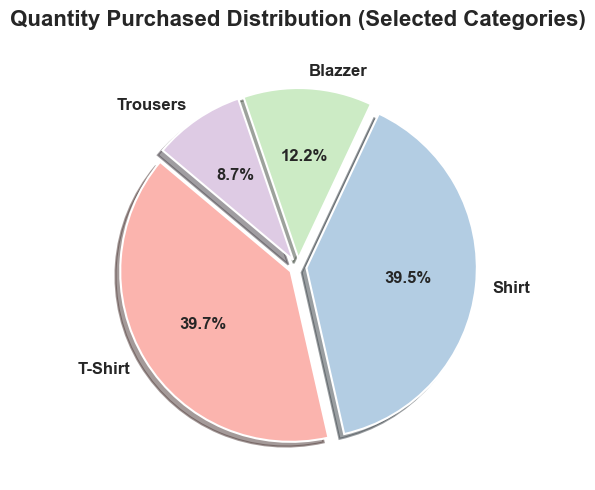

In [ ]:
demo['Category'] = demo['Category'].str.strip().str.title()
categories = ['T-Shirt', 'Shirt', 'Blazzer', 'Trousers']  
qty_per_category = demo.groupby('Category')['Qty'].sum().reindex(categories, fill_value=0)

colors = plt.get_cmap('Pastel1').colors

plt.figure(figsize=(10,5))  
plt.pie(qty_per_category.values, labels=qty_per_category.index, 
        autopct='%1.1f%%', startangle=140, colors=colors, 
        explode=[0.05]*len(qty_per_category), shadow=True, 
        wedgeprops={'edgecolor':'white', 'linewidth':1.5},
        textprops={'fontsize':12, 'fontweight':'bold'})

plt.title("Quantity Purchased Distribution (Selected Categories)", fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

### Insights :

1.  **Shared Dominance Confirmed**: Both the Pareto chart and the pie chart highlight the overwhelming dominance of the **T-Shirt** and **Shirt** categories. The Pareto chart shows they collectively account for **77.4%** of all units sold, while the pie chart isolates the top four categories and confirms that T-Shirt and Shirt hold a combined share of nearly **80%** of all purchases within that group.

2.  **Proportional Contribution of Top Performers**: The pie chart provides a clear visual breakdown of the relative contribution of the top four categories. It shows that **T-Shirt** ($39.7\%$) and **Shirt** ($39.5\%$) have an almost equal share of sales, with **Blazer** ($12.2\%$) and **Trousers** ($8.7\%$) making up the smaller, but still significant, proportion of this high-performing group.

3.  **Comprehensive View of Sales Strategy**: The charts work together to provide a complete strategic picture. The Pareto chart identifies the three categories that drive almost **90%** of all sales, highlighting where to focus resources. The pie chart then provides a more granular view of the top performers, emphasizing the parity between T-Shirt and Shirt and the disproportionate contribution they have even among the best-selling products.

---

**===================================================================================================================**

# **Fulfillment Analysis**

### Fulfilment Distribution

In [ ]:
df_non_cancelled = demo[demo["Courier Status"].str.lower() != "cancelled"]

total_non_cancelled = df_non_cancelled.shape[0]

fulfilment_counts = df_non_cancelled["Fulfilment"].value_counts()

fulfilment_percentages = ((fulfilment_counts / total_non_cancelled) * 100).round(1)

print("Total Non-Cancelled Orders:", total_non_cancelled)
print("Individual Fullfillments :",fulfilment_counts)
print("Individual Fullfillments Percentages:",fulfilment_percentages)


Total Non-Cancelled Orders: 116166
Individual Fullfillments : Fulfilment
Amazon      83773
Merchant    32393
Name: count, dtype: int64
Individual Fullfillments Percentages: Fulfilment
Amazon      72.1
Merchant    27.9
Name: count, dtype: float64


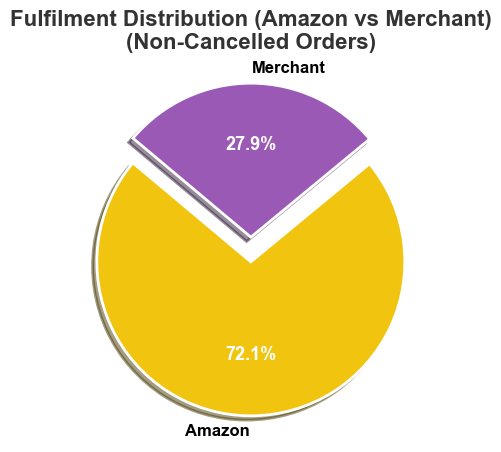

In [ ]:

fulfilment_counts_sample = {"Amazon": 5, "Merchant": 2}
fulfilment_percentages_sample = [72.1, 27.9]

labels = list(fulfilment_counts_sample.keys())
sizes = fulfilment_percentages_sample
colors = ["#F1C40F", "#9B59B6"]  


fig, ax = plt.subplots(figsize=(5,5), subplot_kw=dict(aspect="equal"))
wedges, texts, autotexts = ax.pie(
    sizes, labels=labels, autopct='%1.1f%%', startangle=140,
    shadow=True, explode=(0.08, 0.08), colors=colors,
    wedgeprops={"edgecolor":"white","linewidth":2}
)

plt.setp(texts, size=12, weight="bold", color="black")
plt.setp(autotexts, size=13, weight="bold", color="white")


plt.title("Fulfilment Distribution (Amazon vs Merchant)\n(Non-Cancelled Orders)", 
          fontsize=16, weight="bold", color="#333333")

plt.show()


###  Insights :

1. **Amazon dominates fulfilment** – Out of **116,166 non-cancelled orders**, **72.1%** were fulfilled by **Amazon**, while **27.9%** were handled by **Merchants**. This clearly shows Amazon’s fulfilment system is the primary method used.

2. **Reliability trend** – The higher percentage of orders fulfilled by Amazon indicates stronger reliability and preference among sellers/customers compared to Merchant fulfilment.

3. **Merchant still significant** – Although smaller, **27.9% Merchant fulfilments** still account for nearly **32,400 orders**, which means Merchant fulfilment is still an important contributor but less dominant compared to Amazon.

4. **Effectiveness perspective** – Since only *non-cancelled* orders were considered, the results highlight that **Amazon not only handles the majority of fulfilments but also ensures they are successfully delivered**, strengthening trust in its logistics network.

---



### Effectiveness (Delivery vs Cancellation)

Counts:
 Final_Status  Cancelled  Delivered
Fulfilment                        
Amazon             5940      83773
Merchant           6870      32393

Percentages:
   Fulfilment Final_Status  Percentage
0     Amazon    Cancelled    6.621114
1   Merchant    Cancelled   17.497389
2     Amazon    Delivered   93.378886
3   Merchant    Delivered   82.502611


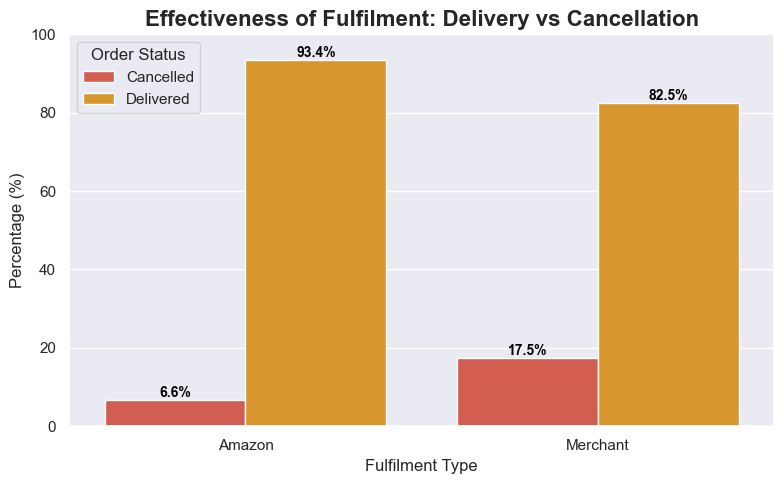

In [ ]:
df_filtered = demo[demo["Fulfilment"].isin(["Amazon", "Merchant"])].copy()

df_filtered["Final_Status"] = df_filtered["Courier Status"].apply(
    lambda x: "Cancelled" if str(x).lower() == "cancelled" else "Delivered"
)

status_counts = df_filtered.groupby(["Fulfilment", "Final_Status"]).size().unstack(fill_value=0)

status_percentages = (status_counts.T / status_counts.sum(axis=1)).T * 100
status_percentages = status_percentages.reset_index().melt(id_vars="Fulfilment", var_name="Final_Status", value_name="Percentage")

print("Counts:\n", status_counts)
print("\nPercentages:\n", status_percentages)

plt.figure(figsize=(8,5))
sns.set_theme(style="darkgrid")

ax = sns.barplot(
    data=status_percentages,
    x="Fulfilment",
    y="Percentage",
    hue="Final_Status",
    palette={"Delivered": "#F39C12", "Cancelled": "#E74C3C"}
)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
      ax.annotate(f"{p.get_height():.1f}%", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, weight="bold", color="black")

plt.title("Effectiveness of Fulfilment: Delivery vs Cancellation", fontsize=16, weight="bold")
plt.ylabel("Percentage (%)", fontsize=12)
plt.xlabel("Fulfilment Type", fontsize=12)
plt.legend(title="Order Status", fontsize=11)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


### 🔍 Insights: Delivery vs Cancellation (Amazon vs Merchant)

1. **Amazon Fulfilment is Highly Reliable**

   * Out of all Amazon-fulfilled orders, **93.4% were successfully delivered**.
   * Only **6.6% got cancelled**, which shows strong logistics and better customer trust.

2. **Merchant Fulfilment Faces More Cancellations**

   * For Merchant-fulfilled orders, cancellation rate is **17.5%**, nearly **3x higher** than Amazon.
   * This indicates possible issues with stock availability, shipping delays, or seller-side inefficiencies.

3. **Customer Experience Impact**

   * Customers ordering via Amazon Fulfilment have a **much higher chance of receiving their product** compared to Merchant.
   * If Merchant sellers want to compete, they must **reduce cancellations significantly** (optimize stock, improve shipping, or rely on Amazon FBA).



✨ In short:
**Amazon is far more effective in order fulfilment, with 9 out of 10 orders delivered successfully, while Merchants cancel almost 1 in 6 orders — hurting reliability.**

---



**===================================================================================================================**

# **Customer Segmentation:**

### Basic Segmentation (Location-Based)

/var/folders/cv/jn5269f15g7gvsxdrc067lbc0000gn/T/ipykernel_92582/368036741.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_states, x="ship-state", y="Total_Revenue", palette="Blues_r")


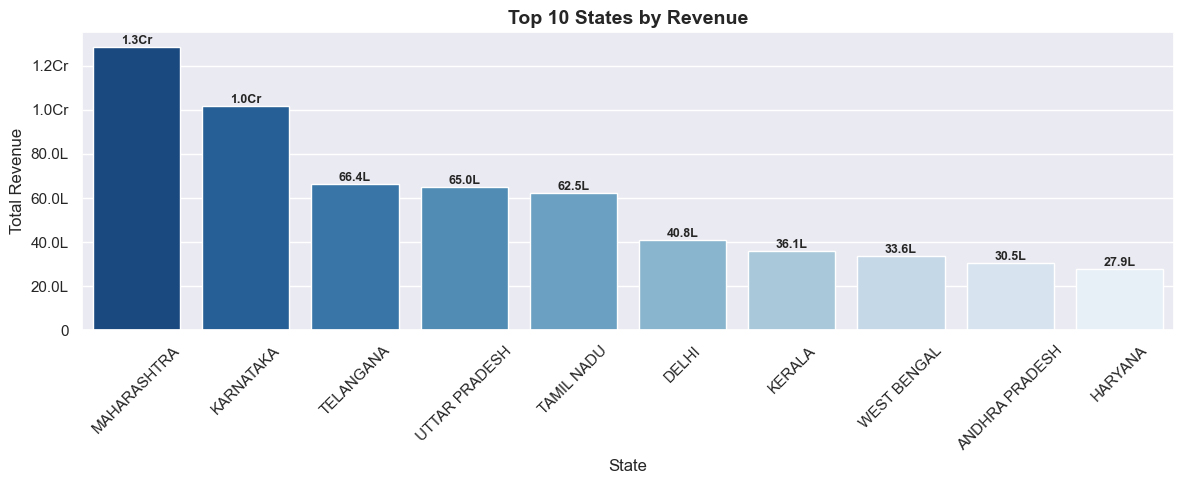

/var/folders/cv/jn5269f15g7gvsxdrc067lbc0000gn/T/ipykernel_92582/368036741.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_cities, x="ship-city", y="Total_Revenue", palette="Greens_r")


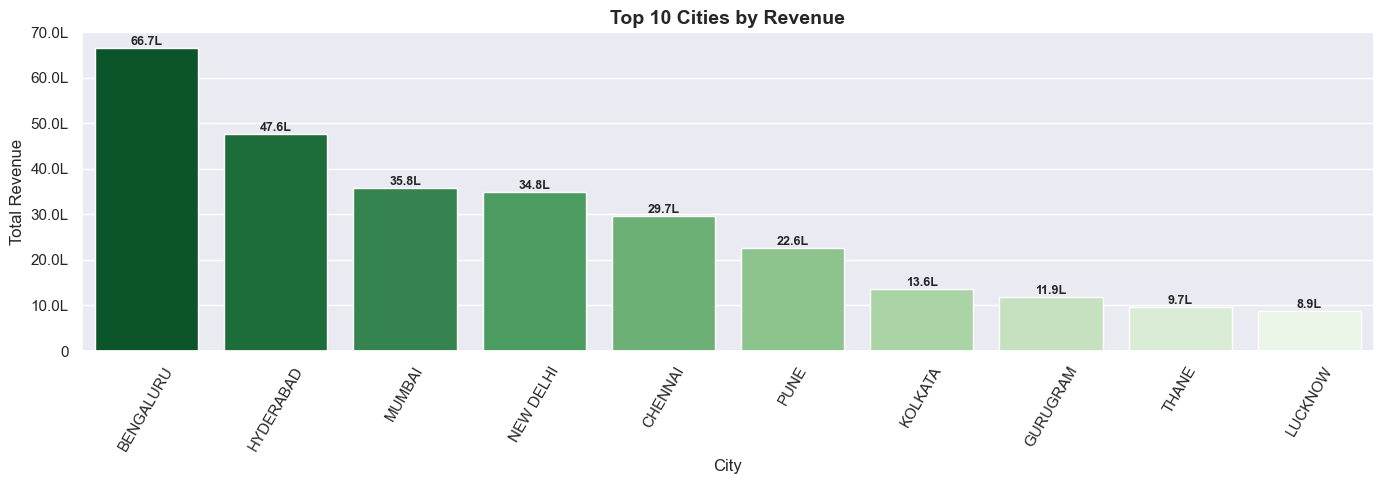

In [ ]:
import matplotlib.ticker as mtick

def format_large_numbers(x, pos):
    if x >= 1e7:
        return f'{x*1e-7:.1f}Cr'   # Crores
    elif x >= 1e5:
        return f'{x*1e-5:.1f}L'    # Lakhs
    elif x >= 1e3:
        return f'{x*1e-3:.1f}K'    # Thousands
    else:
        return int(x)


state_segmentation = demo.groupby("ship-state").agg(
    Number_of_Orders = ("Order ID", "nunique"),   
    Total_Revenue = ("Amount", "sum"),           
    Avg_Order_Value = ("Amount", "mean")         
).reset_index().sort_values(by="Total_Revenue", ascending=False)

top_states = state_segmentation.head(10)




plt.figure(figsize=(12,5))
ax = sns.barplot(data=top_states, x="ship-state", y="Total_Revenue", palette="Blues_r")
plt.xticks(rotation=45)
plt.title("Top 10 States by Revenue", fontsize=14, fontweight="bold")
plt.xlabel("State")
plt.ylabel("Total Revenue")
ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_large_numbers))

for p in ax.patches:
    ax.annotate(format_large_numbers(p.get_height(), None),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# ---------- Top 10 Cities ----------

city_segmentation = demo.groupby("ship-city").agg(
    Number_of_Orders = ("Order ID", "nunique"),
    Total_Revenue = ("Amount", "sum"),
    Avg_Order_Value = ("Amount", "mean")
).reset_index().sort_values(by="Total_Revenue", ascending=False)


top_cities = city_segmentation.head(10)



plt.figure(figsize=(14,5))
ax = sns.barplot(data=top_cities, x="ship-city", y="Total_Revenue", palette="Greens_r")
plt.xticks(rotation=60)
plt.title("Top 10 Cities by Revenue", fontsize=14, fontweight="bold")
plt.xlabel("City")
plt.ylabel("Total Revenue")
ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_large_numbers))

for p in ax.patches:
    ax.annotate(format_large_numbers(p.get_height(), None),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()




**State-Level Insights**

1. **Maharashtra** and **Karnataka** dominate revenue with **₹1.3 Cr** and **₹1.0 Cr** respectively – contributing a massive share of the total.
2. Together, **Top 5 states (Maharashtra, Karnataka, Telangana, UP, Tamil Nadu)** account for the majority of revenue (\~70–75%).
3. States like **Kerala, West Bengal, Andhra Pradesh, Haryana** generate moderate revenue (\~30–40 Lakhs), but still significant compared to long-tail states.
4. This suggests **high geographic concentration** – a few states drive bulk sales, while many states contribute little.



**City-Level Insights**

1. **Bengaluru** is the **single biggest revenue hub (₹66.7 L)** — bigger than many entire states.
2. **Hyderabad, Mumbai, New Delhi, Chennai** are strong Tier-1 city contributors, collectively contributing \~₹1.6 Cr.
3. **Tier-2 cities** like Pune, Gurugram, Thane, Lucknow, and Kolkata show **promising mid-tier demand**, but still far below metros.
4. Bengaluru alone contributes **more than double Hyderabad** and nearly **6x Pune**, highlighting extreme **city-level concentration**.



 **Strategic Takeaways**

* **Focus on Top States/Cities**: Maharashtra, Karnataka, Telangana, and cities like Bengaluru, Hyderabad, and Mumbai should be **priority regions** for campaigns, logistics, and inventory stocking.
* **Tier-2 Expansion Potential**: Pune, Lucknow, Thane, and Gurugram are emerging demand pockets. With targeted promotions & logistics support, these could scale faster.
* **Risk of Over-Concentration**: Heavy reliance on **Bengaluru + Maharashtra/Karnataka** is risky. If demand drops there, overall sales could be hit. Diversification into **other metros & Tier-2 cities** is important.



In short: **Bengaluru + Maharashtra/Karnataka are the backbone**, but you need to **expand Tier-2 cities** to reduce dependency and unlock new growth.

---

### Buying Behaviour Segmentation

 Purchase Type Distribution:
num_orders
One-Time Buyer    113241
Repeat Buyer        6988
Name: count, dtype: int64


/var/folders/cv/jn5269f15g7gvsxdrc067lbc0000gn/T/ipykernel_90180/4071173710.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=repeat_stats.index, y=repeat_stats.values, palette="pastel")


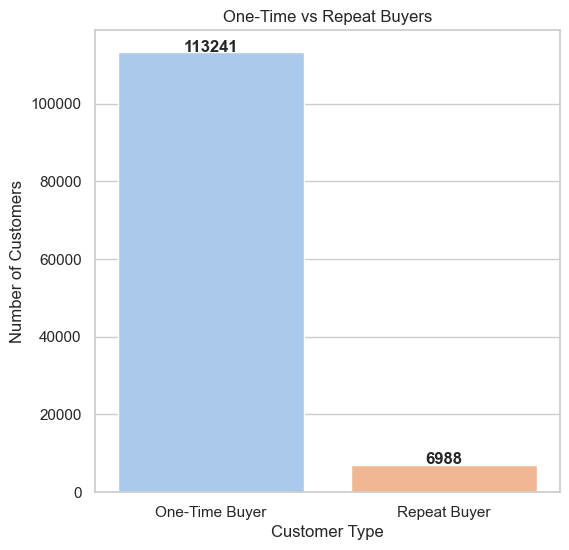


📊 Average Spend Statistics:
Total Orders Analyzed : 120229
Mean Spend            : 585.93
Median Spend          : 569.00
Standard Deviation    : 330.52
Minimum Spend         : 0.00
Maximum Spend         : 5495.00
25th Percentile (Q1)  : 399.00
75th Percentile (Q3)  : 771.00


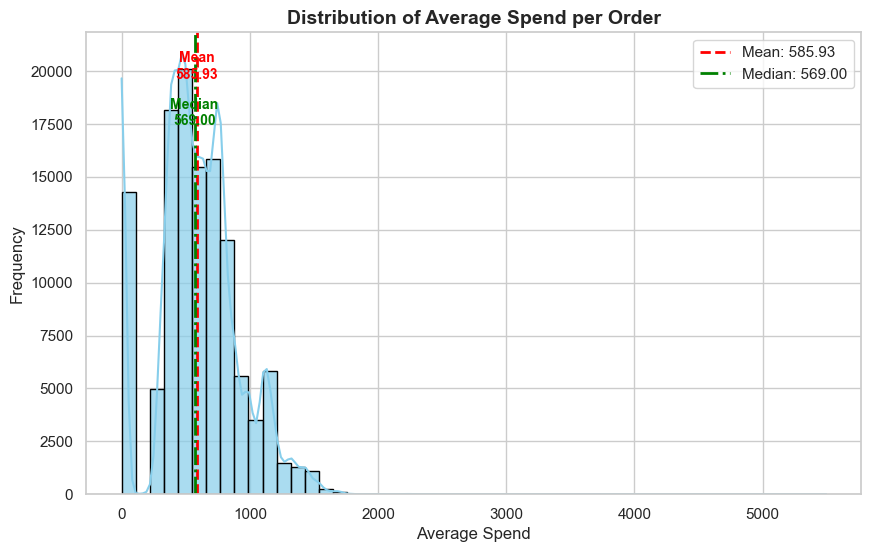


📊 Preferred Categories (Top 10 by Revenue):
Category
T-shirt     37662529.0
Shirt       20452172.0
Blazzer     10628896.0
Trousers     5202227.0
Perfume       758913.0
Wallet        434751.0
Socks         140586.0
Shoes         119328.0
Watch            915.0
Name: Amount, dtype: float64


/var/folders/cv/jn5269f15g7gvsxdrc067lbc0000gn/T/ipykernel_90180/4071173710.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


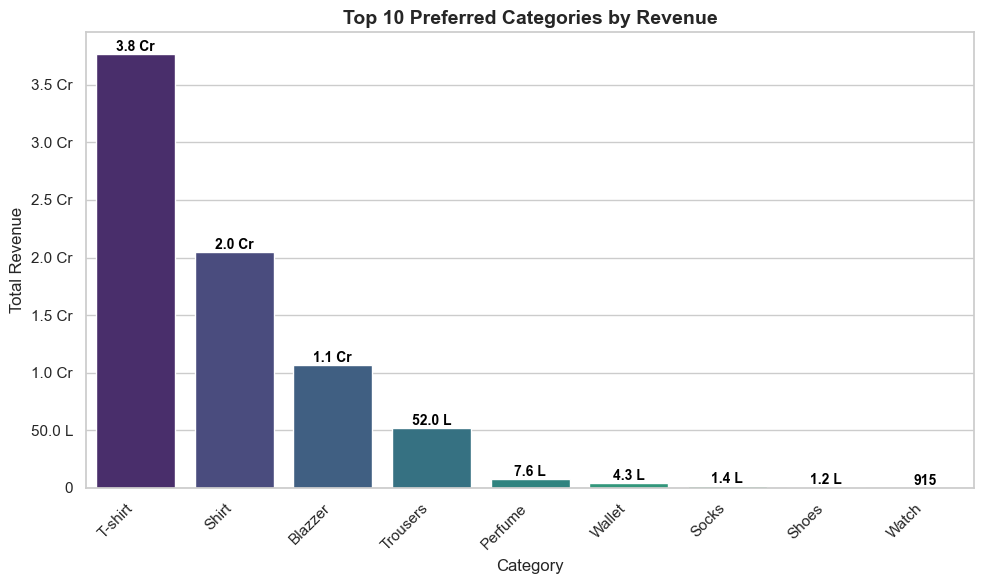

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Total Purchases (Repeat vs One-Time)
order_counts = demo.groupby("Order ID").size().reset_index(name="num_orders")
purchase_type = order_counts["num_orders"].apply(lambda x: "Repeat Buyer" if x > 1 else "One-Time Buyer")

repeat_stats = purchase_type.value_counts()
print(" Purchase Type Distribution:")
print(repeat_stats)

plt.figure(figsize=(6,6))
ax = sns.barplot(x=repeat_stats.index, y=repeat_stats.values, palette="pastel")
plt.title("One-Time vs Repeat Buyers")
plt.ylabel("Number of Customers")
plt.xlabel("Customer Type")

for i, v in enumerate(repeat_stats.values):
    ax.text(i, v + 200, str(v), ha='center', fontsize=12, fontweight='bold')

plt.show()



# 2. Average Spend (Order Value Distribution)
avg_spend = demo.groupby("Order ID")["Amount"].mean()

# Detailed Stats
print("\n📊 Average Spend Statistics:")
print(f"Total Orders Analyzed : {len(avg_spend)}")
print(f"Mean Spend            : {avg_spend.mean():.2f}")
print(f"Median Spend          : {avg_spend.median():.2f}")
print(f"Standard Deviation    : {avg_spend.std():.2f}")
print(f"Minimum Spend         : {avg_spend.min():.2f}")
print(f"Maximum Spend         : {avg_spend.max():.2f}")
print(f"25th Percentile (Q1)  : {avg_spend.quantile(0.25):.2f}")
print(f"75th Percentile (Q3)  : {avg_spend.quantile(0.75):.2f}")

plt.figure(figsize=(10,6))
sns.histplot(avg_spend, bins=50, kde=True, color="skyblue", edgecolor="black", alpha=0.7)
plt.title("Distribution of Average Spend per Order", fontsize=14, fontweight="bold")
plt.xlabel("Average Spend", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

mean_val = avg_spend.mean()
median_val = avg_spend.median()
plt.axvline(mean_val, color="red", linestyle="--", linewidth=2, label=f"Mean: {mean_val:.2f}")
plt.axvline(median_val, color="green", linestyle="-.", linewidth=2, label=f"Median: {median_val:.2f}")

plt.text(mean_val, plt.gca().get_ylim()[1]*0.9, f"Mean\n{mean_val:.2f}", color="red", 
         ha="center", fontsize=10, fontweight="bold")
plt.text(median_val, plt.gca().get_ylim()[1]*0.8, f"Median\n{median_val:.2f}", color="green", 
         ha="center", fontsize=10, fontweight="bold")

plt.legend()
plt.show()


import matplotlib.ticker as mtick

def indian_format(x, pos):
    if x >= 1e7:   # Crores
        return f'{x/1e7:.1f} Cr'
    elif x >= 1e5: # Lakhs
        return f'{x/1e5:.1f} L'
    else:
        return f'{int(x)}'

category_pref = demo.groupby("Category")["Amount"].sum().sort_values(ascending=False)
print("\n📊 Preferred Categories (Top 10 by Revenue):")
print(category_pref.head(10))

plt.figure(figsize=(10,6))
ax = sns.barplot(
    x=category_pref.head(10).index,
    y=category_pref.head(10).values,
    palette="viridis"
)

plt.title("Top 10 Preferred Categories by Revenue", fontsize=14, fontweight="bold")
plt.xlabel("Category", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)

plt.xticks(rotation=45, ha="right")

# Format y-axis into Lakhs/Cr
ax.yaxis.set_major_formatter(mtick.FuncFormatter(indian_format))

for p in ax.patches:
    value = p.get_height()
    ax.annotate(indian_format(value, None), 
                (p.get_x() + p.get_width()/2., value), 
                ha='center', va='bottom', fontsize=10, fontweight="bold", color="black")

plt.tight_layout()
plt.show()








###  Customer Purchase Insights 



 **1. One-Time vs Repeat Buyers**

* **Findings:**

  * **One-Time Buyers:** \~113K (94%)
  * **Repeat Buyers:** \~7K (6%)

* **Insights:**

  * Customer **retention is extremely weak** – majority do not return after their first purchase.
  * Indicates **low brand loyalty** or **lack of engagement after purchase**.
  * **Opportunity:**

    * Launch **loyalty programs** (discounts, points system).
    * Use **personalized retargeting campaigns** to bring one-time buyers back.



 **2. Average Spend per Order**

* **Findings:**

  * **Mean Spend:** \~₹586
  * **Median Spend:** \~₹569
  * Majority of orders are in the **₹500 – ₹1000** range.
  * Occasional high-value orders cross **₹2000+.**

* **Insights:**

  * Customers are mainly **budget-conscious**, sticking to mid-range items.
  * Small but valuable **premium segment** exists (high spenders).
  * **Opportunity:**

    * Push **upselling & cross-selling** (e.g., combo offers, add-ons).
    * Introduce **bundled offers** to shift average spend **above ₹1000.**



 **3. Revenue Contribution by Category**

* **Findings:**

  * **T-Shirts:** ₹3.8 Cr (highest revenue driver).
  * **Shirts:** ₹2 Cr.
  * **Blazers & Trousers:** Significant contributors.
  * **Accessories (Perfume, Wallet, Socks, Shoes, Watch):** Minimal contribution.

* **Insights:**

  * Revenue is **heavily dependent on apparel** (T-shirts & Shirts dominate).
  * Accessories underperform but can act as **cross-sell items**.
  * **Opportunity:**

    * Strengthen **apparel marketing**, especially casual wear.
    * Use **accessories as bundled add-ons** to increase overall revenue.



 **4. Strategic Takeaways**

1. **Retention Gap** → Retargeting & loyalty programs needed.
2. **Low Average Order Value** → Upsell, cross-sell & bundle offers to push higher spends.
3. **Category Dependency** → Apparel drives business, accessories should be leveraged for **incremental revenue.**

---

 

### High-Value vs Low-Value Customers


 Customer Segmentation (High / Medium / Low Value):
Amount
Low Value       104246
Medium Value     14967
High Value        1016
Name: count, dtype: int64


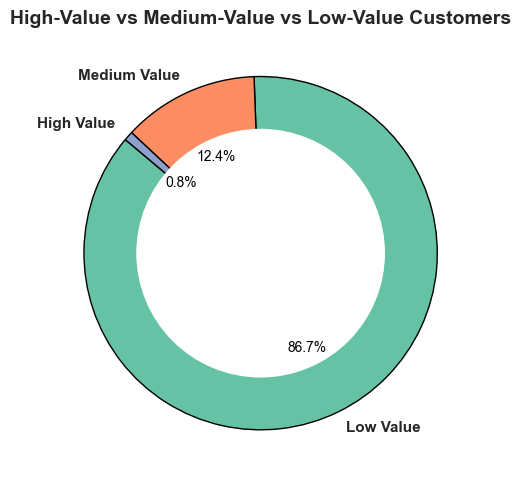

In [ ]:
# Calculate total spend per customer (Order ID used as proxy)
customer_spend = demo.groupby("Order ID")["Amount"].sum()

# Define tiers
def classify_customer(amount):
    if amount > 2000:
        return "High Value"
    elif amount >= 1000:
        return "Medium Value"
    else:
        return "Low Value"

customer_tiers = customer_spend.apply(classify_customer)

tier_counts = customer_tiers.value_counts()
print("\n Customer Segmentation (High / Medium / Low Value):")
print(tier_counts)

palette = sns.color_palette("Set2", n_colors=3)

plt.figure(figsize=(5,5))
wedges, texts, autotexts = plt.pie(
    tier_counts.values,
    labels=tier_counts.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=palette,
    wedgeprops={"edgecolor":"black", "linewidth":1}
)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

for autotext in autotexts:
    autotext.set_color("black")
    autotext.set_fontsize(10)
for text in texts:
    text.set_fontsize(11)
    text.set_fontweight("bold")

plt.title("High-Value vs Medium-Value vs Low-Value Customers", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


### Insights :
1. **Low-Value Customers Dominate**
   – Around **86.7%** of customers spend **less than ₹1000** in total.
   – This indicates that the majority of the customer base contributes very little individually, suggesting reliance on volume rather than high-spend clients.

2. **Medium-Value Customers Form a Small Segment**
   – About **12.4%** of customers spend between **₹1000–₹2000**.
   – This segment is relatively small but important since they may be nurtured into high-value customers with targeted offers, loyalty programs, or upselling.

3. **High-Value Customers Are Extremely Rare**
   – Only **0.8%** of customers spend more than **₹2000**.
   – Even though small in number, they are the most profitable group, contributing disproportionately higher revenue.

 **Key Business Implication:**
Your business is heavily dependent on **low-spending customers**. If acquisition costs are high, this could be risky. To maximize growth:

* Introduce **loyalty/discount programs** to push low-value customers into medium-value.
* Give **personalized offers and exclusive benefits** to retain and expand the high-value group.
* Identify patterns of **what medium and high-value customers buy** and promote those to low-value ones.

---

**===================================================================================================================**

# **Geographical Analysis**

### Top States and Cities  by Sales 

/var/folders/cv/jn5269f15g7gvsxdrc067lbc0000gn/T/ipykernel_92582/2338567533.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=state_sales.values/1e5, y=state_sales.index, palette="mako")


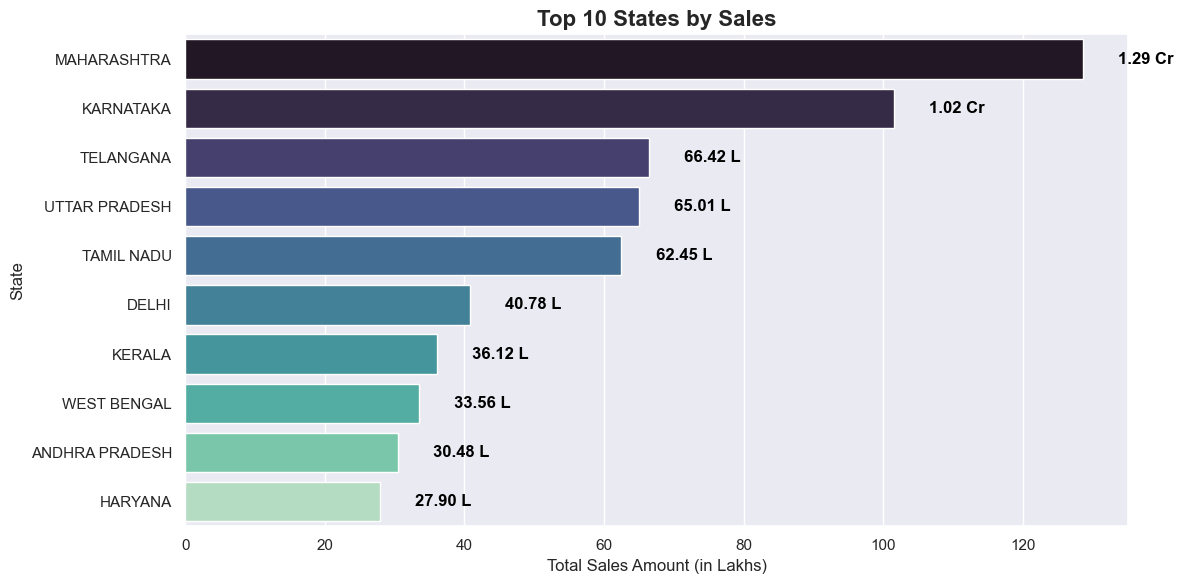

/var/folders/cv/jn5269f15g7gvsxdrc067lbc0000gn/T/ipykernel_92582/2338567533.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=city_sales.values/1e5, y=city_sales.index, palette="viridis")


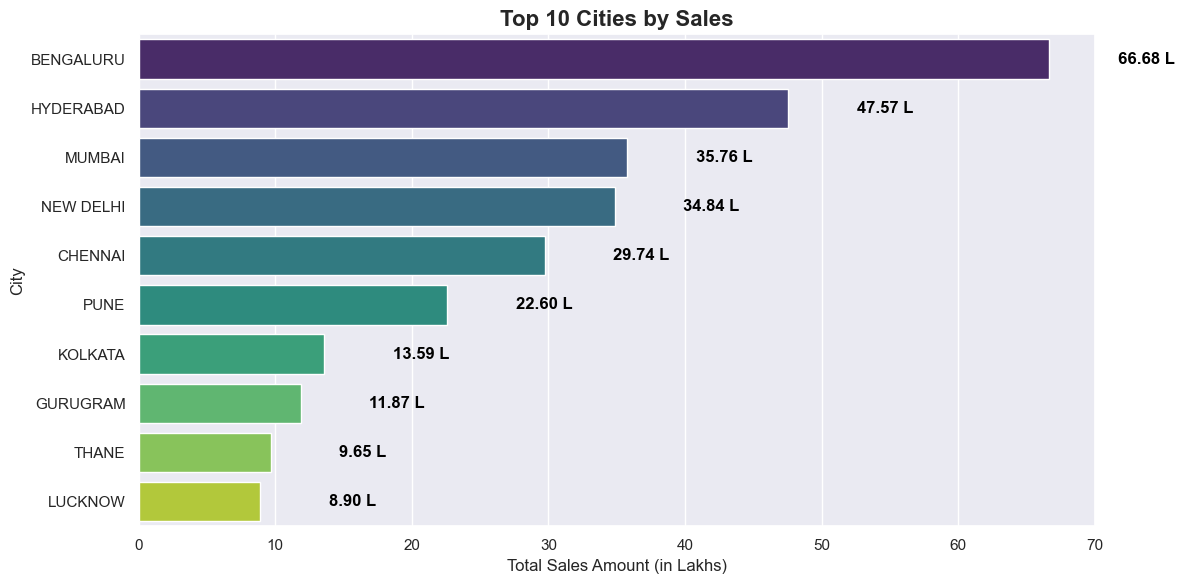

In [ ]:


#  format sales in Lakhs / Crores
def format_sales(amount):
    if amount >= 1e7:  # 1 Crore = 1e7
        return f"{amount/1e7:.2f} Cr"
    else:
        return f"{amount/1e5:.2f} L"

# ---------------- Top 10 States by Sales ----------------
state_sales = demo.groupby("ship-state")["Amount"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.set_style("darkgrid")

ax = sns.barplot(x=state_sales.values/1e5, y=state_sales.index, palette="mako")

# Add value labels
for i, v in enumerate(state_sales.values):
    ax.text(v/1e5 + 5, i, format_sales(v), color="black", va="center", fontweight="bold")

plt.title("Top 10 States by Sales", fontsize=16, fontweight="bold")
plt.xlabel("Total Sales Amount (in Lakhs)", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.tight_layout()
plt.show()


# ---------------- Top 10 Cities by Sales ----------------
city_sales = demo.groupby("ship-city")["Amount"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.set_style("darkgrid")

ax = sns.barplot(x=city_sales.values/1e5, y=city_sales.index, palette="viridis")

for i, v in enumerate(city_sales.values):
    ax.text(v/1e5 + 5, i, format_sales(v), color="black", va="center", fontweight="bold")

plt.title("Top 10 Cities by Sales", fontsize=16, fontweight="bold")
plt.xlabel("Total Sales Amount (in Lakhs)", fontsize=12)
plt.ylabel("City", fontsize=12)
plt.tight_layout()
plt.show()


### Insights :
**Top 10 States by Sales**

1. **Maharashtra** leads with the highest sales (~~₹1.29 Cr), followed by **Karnataka** (~~₹1.02 Cr). These two alone contribute a huge chunk of overall sales.
2. Other strong performers are **Telangana, Uttar Pradesh, and Tamil Nadu** – each generating \~₹60–66 Lakhs.
3. States like **Kerala, West Bengal, Andhra Pradesh, and Haryana** have significantly lower sales compared to the top two, showing a clear sales concentration in only a few regions.
4. This suggests that the business is heavily driven by **urbanized, metro-rich states**.



**Top 10 Cities by Sales**

1. **Bengaluru** dominates with ~~₹66.68 Lakhs, followed by **Hyderabad** (~~₹47.57 Lakhs). Both cities together contribute more than many entire states.
2. Other metro hubs like **Mumbai, New Delhi, and Chennai** also contribute strongly (\~₹30–36 Lakhs each).
3. **Pune, Kolkata, Gurugram, Thane, and Lucknow** form the lower half, each under ₹25 Lakhs.
4. Overall, **metros and tier-1 cities are driving sales**, while tier-2 cities (like Lucknow) still contribute but at much smaller scales.

 **Key Takeaway**:
The sales are **heavily concentrated in metro states and cities**, especially in **Maharashtra (Mumbai, Thane, Pune), Karnataka (Bengaluru), and Telangana (Hyderabad)**. For growth, focusing on **tier-2 states/cities** could diversify revenue and reduce dependency on a few regions.

---


### Top 10 States by Business to Business Orders

/var/folders/cv/jn5269f15g7gvsxdrc067lbc0000gn/T/ipykernel_92582/2447452216.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=df_b2b.index, x=df_b2b.values, palette='viridis')


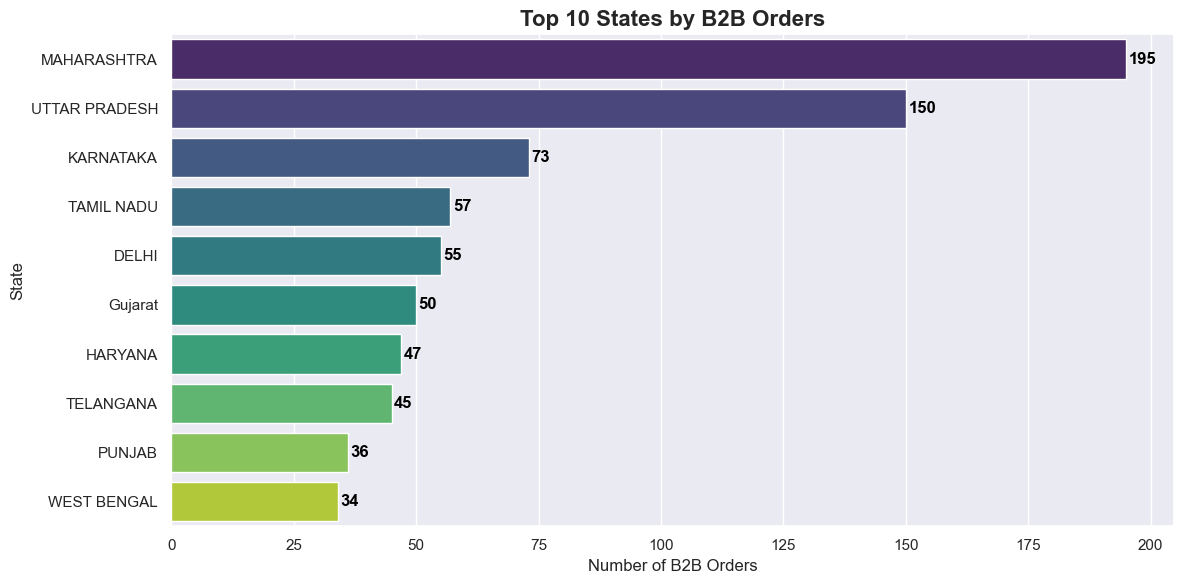

In [ ]:
df_b2b = demo.groupby('ship-state')['B2B'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.set_style('darkgrid')

ax = sns.barplot(y=df_b2b.index, x=df_b2b.values, palette='viridis')

for i, v in enumerate(df_b2b.values):
    ax.text(v + 0.5, i, str(v), color='black', va='center', fontweight='bold')

# Titles and labels
plt.title("Top 10 States by B2B Orders", fontsize=16, fontweight='bold')
plt.xlabel("Number of B2B Orders", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.tight_layout()
plt.show()

### Insights :


1. **Maharashtra dominates** with **195 B2B orders**, the clear leader.
   → Strong industrial and corporate base drives bulk ordering.

2. **Uttar Pradesh** is second with **150 orders**, showing that B2B is strong not just in metros but also in high-population states with growing SME activity.

3. **Karnataka (73 orders)** is far behind the top 2, but still ranks 3rd, mainly because of Bengaluru’s corporate and tech ecosystem.

4. **Tamil Nadu (57) and Delhi (55)** are in the mid-tier, reflecting strong manufacturing (TN) and commercial/retail hubs (Delhi).

5. **Gujarat (50) and Haryana (47)** follow closely, both known for manufacturing and wholesale trading hubs.

6. **Telangana (45)** shows Hyderabad’s role in IT and pharma-led B2B.

7. **Punjab (36) and West Bengal (34)** round off the top 10 — lower volumes but still significant in their regions.

**Key takeaway:**
B2B orders are highly **concentrated in Maharashtra & UP (together \~50% of orders)**, while the rest of the states contribute much smaller shares. This shows a **two-tier structure**: industrial/corporate-heavy states dominate bulk orders, while other states are secondary contributors.

---

### Order Status distribution

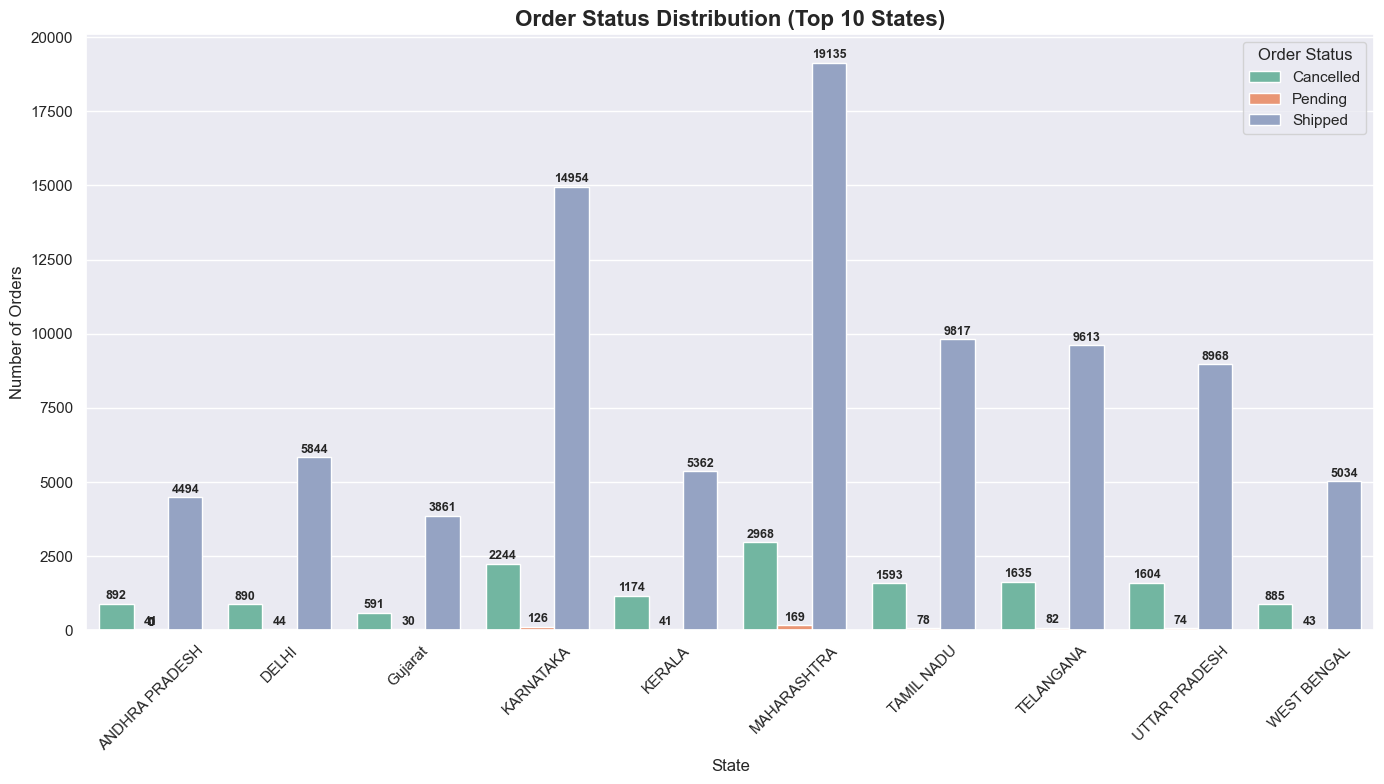

In [ ]:
def simplify_status(x):
    if "Cancelled" in x:
        return "Cancelled"
    elif "Pending" in x:
        return "Pending"
    else:
        return "Shipped"

demo["Order_Status"] = demo["Status"].apply(simplify_status)

top_states = demo["ship-state"].value_counts().head(10).index

filtered = demo[demo["ship-state"].isin(top_states)]

state_cancel = filtered.groupby(["ship-state", "Order_Status"])["Order ID"].count().reset_index()
state_cancel.rename(columns={"Order ID": "Order_Count"}, inplace=True)

plt.figure(figsize=(14,8))
sns.set_style("darkgrid")

ax = sns.barplot(data=state_cancel, x="ship-state", y="Order_Count", hue="Order_Status", palette="Set2")

for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width()/2,     
        p.get_y() + p.get_height() + 50, 
        int(p.get_height()),             
        ha="center", va="bottom", fontsize=9, fontweight="bold"
    )

plt.title("Order Status Distribution (Top 10 States)", fontsize=16, fontweight="bold")
plt.xticks(rotation=45)
plt.xlabel("State", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.legend(title="Order Status")
plt.tight_layout()
plt.show()

### Insights :

1. **Shipped orders dominate** in all states — this means fulfillment efficiency is strong overall.

   * Maharashtra (19,135), Karnataka (14,954), and Tamil Nadu (9,817) lead in shipped volumes.

2. **Cancellation rates are significant in some states:**

   * Karnataka (2,244 cancelled) and Maharashtra (2,968 cancelled) stand out → possibly due to order rejections, logistics, or returns.

3. **Pending orders are negligible** compared to shipped and cancelled, showing fast processing and lower backlog.

4. **Key takeaway:**

   * While the majority of orders are successfully shipped, **Maharashtra and Karnataka need attention** to reduce cancellations, since their cancelled orders are comparatively high despite strong sales volumes.

---


### Best Selling Cities from Top States

/var/folders/cv/jn5269f15g7gvsxdrc067lbc0000gn/T/ipykernel_92582/341798529.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


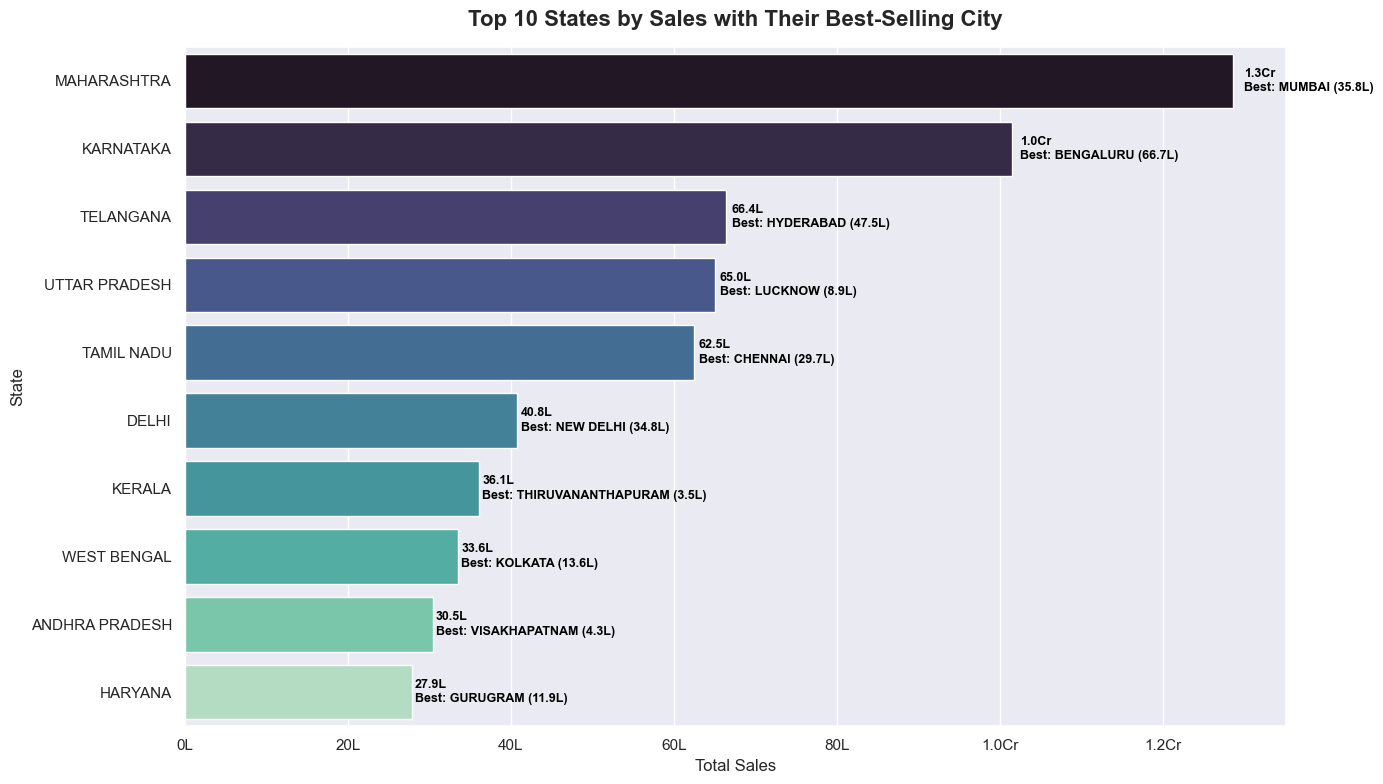

In [ ]:
top_states_sales = demo.groupby("ship-state")["Amount"].sum().nlargest(10).reset_index()
top_states = top_states_sales["ship-state"]

filtered = demo[demo["ship-state"].isin(top_states)]

best_cities = (
    filtered.groupby(["ship-state", "ship-city"])["Amount"].sum()
    .reset_index()
    .sort_values(["ship-state", "Amount"], ascending=[True, False])
    .drop_duplicates(subset=["ship-state"])
)

merged = pd.merge(top_states_sales, best_cities, on="ship-state", suffixes=("_State", "_City"))

def format_sales(x):
    if x >= 1e7:  # 1 crore = 1e7
        return f"{x/1e7:.1f}Cr"
    else:
        return f"{x/1e5:.1f}L"

plt.figure(figsize=(14,8))
sns.barplot(
    data=merged.sort_values("Amount_State", ascending=False),
    x="Amount_State", y="ship-state", palette="mako"
)

plt.title("Top 10 States by Sales with Their Best-Selling City", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Total Sales", fontsize=12)
plt.ylabel("State", fontsize=12)

def lakh_cr_formatter(x, pos):
    if x >= 1e7:
        return f"{x/1e7:.1f}Cr"
    else:
        return f"{x/1e5:.0f}L"

plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lakh_cr_formatter))

for i, row in merged.sort_values("Amount_State", ascending=False).iterrows():
    plt.text(
        row["Amount_State"] + row["Amount_State"]*0.01, i,  # small shift
        f"{format_sales(row['Amount_State'])}\nBest: {row['ship-city']} ({format_sales(row['Amount_City'])})",
        va="center", fontsize=9, fontweight="bold", color="black"
    )

plt.tight_layout()
plt.show()

### Insights :


1. **Maharashtra leads by far** with ₹1.3 Cr sales, driven by Mumbai (₹35.8L) — Mumbai alone contributes over **27%** of state sales.

2. **Karnataka is second (₹1.0 Cr)**, with Bengaluru as the standout city (₹66.7L), making up a massive **\~67%** of state sales → Bengaluru is the strongest single-city contributor across all states.

3. **Telangana (₹66.4L) and Uttar Pradesh (₹65.0L)** are very close in performance. However, Telangana’s sales are heavily concentrated in Hyderabad (₹47.5L), while UP is more distributed, with Lucknow contributing only ₹8.9L.

4. **Tamil Nadu (₹62.5L)** relies strongly on Chennai (₹29.7L), which accounts for nearly **half the state’s sales**.

5. **Delhi (₹40.8L)** is unique because its best-selling city (New Delhi, ₹34.8L) nearly equals the entire state’s sales → meaning Delhi is highly **city-centric**.

6. States like **Kerala, West Bengal, Andhra Pradesh, and Haryana** have relatively smaller contributions from their top cities, showing more **distributed demand** across multiple cities instead of being dominated by one.

 **Key takeaway:**

* Maharashtra and Karnataka are sales powerhouses, but **Bengaluru and Mumbai are the most critical markets to protect and expand**.
* Telangana and Tamil Nadu are city-driven markets (Hyderabad, Chennai).
* Uttar Pradesh, West Bengal, and Kerala show a **more balanced distribution** → opportunities lie beyond just the top city.

---


**===================================================================================================================**

# **Final Recomendations**


---

### Key Insights & Analysis Summary

The business has **strong revenue performance** with a total of ₹75.4M from 128,976 orders. However, this success is heavily concentrated in a few key areas:

* **Product and Order Skew:** The business follows the **80/20 rule**. The majority of sales volume and revenue comes from a small number of products, specifically **T-shirts and Shirts**. The **Average Order Value (AOV)** is low at just ₹585, and most orders consist of only one item, indicating a significant opportunity for upselling.
* **Customer Behavior:** The customer base is largely composed of **one-time, low-value buyers**. Over 86% of customers spend less than ₹1,000, and only about 6% are repeat buyers. This points to a major **customer retention gap**.
* **Geographic and Time Concentration:** Sales are highly concentrated in specific regions and time periods.
    * **Geographically**, **Maharashtra and Karnataka** are the top-performing states, with **Bengaluru and Mumbai** as the most critical city-level markets.
    * **Temporally**, revenue is highly seasonal, with a peak in **Q2 (April–June)** and a significant drop-off in other months. Weekly sales also peak on **Saturdays**.
* **Operational Bottlenecks:** While overall fulfillment is strong, a notable **10% of orders are cancelled**, with **Merchant-fulfilled orders** having a cancellation rate nearly three times higher than Amazon's. This suggests inefficiencies and a potential negative impact on customer trust.

---

### Strategic Recommendations

#### 1. Boost Average Order Value (AOV)

Since the business has a large customer base but a low AOV, the fastest way to increase revenue is by encouraging customers to spend more per order.

* **Implement Bundled Offers and Combos:** Create attractive **"T-shirt + Trousers"** or **"Shirt + Blazer"** bundles at a slight discount. This encourages customers to buy multiple, complementary items in one transaction.
* **Cross-sell and Upsell:** Promote low-contributing accessories like **Perfume, Wallets, and Socks** as add-ons at checkout. For example, a customer buying a T-shirt could be prompted with "Complete your look with a pair of matching socks."
* **Introduce a Shipping Threshold:** Offer free shipping for orders above a certain value (e.g., ₹750) to incentivize customers to add more items to their cart to reach the threshold.

#### 2. Enhance Customer Retention

The low rate of repeat buyers is a significant risk. Focus on turning one-time customers into loyal, high-value ones.

* **Launch a Loyalty Program:** Implement a tiered points system where customers earn rewards or discounts for repeat purchases. This directly addresses the low brand loyalty issue.
* **Personalized Post-Purchase Engagement:** Send automated email or SMS campaigns to one-time buyers with personalized recommendations based on their first purchase, along with a special discount code to encourage them to return.

#### 3. Optimize Marketing & Operations

Refine your strategies by leveraging the data on your product, geography, and seasonality.

* **Targeted Marketing Campaigns:** Allocate a larger portion of your marketing budget to the top-performing categories (**T-shirts and Shirts**) and prioritize advertising in high-revenue regions like **Maharashtra, Karnataka, and cities like Bengaluru and Mumbai**.
* **Maximize Peak Periods:** Run special promotions and new product launches on **Saturdays**, which is your highest-revenue day. Also, prepare for and maximize the **Q2 sales season** with ample inventory and marketing campaigns to capitalize on the surge in demand.
* **Address High Cancellations:** Investigate the root cause of the high cancellation rate for **Merchant-fulfilled orders**. This could involve auditing inventory management, improving logistics for these sellers, or encouraging them to switch to an Amazon fulfillment model to improve customer trust and reduce lost sales.

---

By focusing on these three core areas—increasing AOV, improving retention, and optimizing operations based on key data—you can transform the business from one that relies on a high volume of low-value, one-time sales into a more profitable, sustainable enterprise.

**===================================================================================================================**

**===================================================================================================================**